# Videogame Sales Case

## Setup

### Libraries || Bibliotecas

In [1]:
import pandas as pd
import numpy as np
from math import isnan, ceil, floor
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

### Recurring Functions || Funções de uso Recorrente

In [2]:
def print_info(df:pd.DataFrame)->None:
  print()
  print("---------------------")
  print()
  df.info()
  print()
  print("---------------------")
  print("---------------------")
  print()
  print(df.head(10))
  print()
  print("---------------------")
  print("---------------------")
  print()
  print(df.describe(include='all'))
  print()
  print("---------------------")
  print()

def print_unique(column:pd.Series)->None:
  print()
  print("---------------------")
  print(f'Informações de valores únicos: {column.name}')
  print(f'Contagem de valores únicos: {column.nunique()}')
  print("---------------------")
  print()
  print(column.unique())
  print()
  print("---------------------")

def games_with_different_data_nullable(df:pd.DataFrame,common_col:str, col:str)-> list:
  """
  Essa função, busca jogos, que possuem o mesmo nome, porém determinada coluna
  possuem informações diferentes, sendo uma delas um valor nulo, e retorna uma lista
  com o nome desses jogos.
  EX:
  Name  | Platform  | Score
  Game1 | Platform1 | 99
  Game1 | Platform2 | 98
  Game1 | Platform3 | 96
  Game1 | Platform4 | nan
  Game2 | Platform2 | 65
  Game3 | Platform2 | 34
  Game3 | Platform3 | 37
  Game4 | Platform1 | nan

  games_with_different_data_nullable(df, Score) -> [Game1]
  """
  games_with_different_data = df.groupby(common_col).filter(lambda x: x[col].nunique() > 1)
  games_with_different_data_na = games_with_different_data[games_with_different_data[col].isna()][common_col].unique()
  games_with_different_data_not_na = games_with_different_data[~games_with_different_data[col].isna()][common_col].unique()
  games_with_different_data_potentially_fixable = [value for value in games_with_different_data_na if value in games_with_different_data_not_na]
  return games_with_different_data_potentially_fixable

## Data Description

- **Name**: The name of the video game.
- **Platform**: The platform the game was released on.
- **Year_of_Release**: The release year of the game.
- **Genre**: The genre of the game.
- **NA_sales**: North American sales in millions of USD.
- **EU_sales**: European sales in millions of USD.
- **JP_sales**: Japanese sales in millions of USD.
- **Other_sales**: Sales in other regions in millions of USD.
- **Critic_Score**: Critic's score (maximum of 100).
- **User_Score**: User's score (maximum of 10).
- **Rating**: ESRB rating (Entertainment Software Rating Board).

---
---

## Descrição dos Dados

- **Name**: Nome do jogo.
- **Platform**: Plataforma em que o jogo foi lançado.
- **Year_of_Release**: Ano de lançamento do jogo.
- **Genre**: Gênero do jogo.
- **NA_sales**: Vendas na América do Norte em milhões de USD.
- **EU_sales**: Vendas na Europa em milhões de USD.
- **JP_sales**: Vendas no Japão em milhões de USD.
- **Other_sales**: Vendas em outras regiões em milhões de USD.
- **Critic_Score**: Pontuação dos críticos (máximo de 100).
- **User_Score**: Pontuação dos usuários (máximo de 10).
- **Rating**: Classificação ESRB (Entertainment Software Rating Board).

## Step 1 || Etapa 1
- Opening the file, taking first conclusions and tracing a roadmap for the study
---
- Abrindo o arquivo de dados, tirando primeiras conclusões e traçando a rota para o estudo do caso

In [3]:
df = pd.read_csv('datasets/games.csv')
df.drop_duplicates(inplace=True)
print_info(df)


---------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB

---------------------
---------------------

                        Name Platform  Year_of_Release         Genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros

### 1.1 General Observation | Observação Geral
Após ler o arquivo, e imprimir as principais informações dele na tela:
- 1.1.1 Verificar quais são os gêneros existentes (12 valores únicos), as plataformas existentes (31 valores únicos) e a classificação (rating) (8 valores únicos) - para garantir se não há nenhuma plataforma, gênero ou classificação escrito incorretamente.
- 1.1.2 Verificar se todas as informações de anos estão sem casas decimais (se tiver, quero tentar entender o motivo, para resolver da melhor maneira, visto que a informação de ano deve ser número inteiro), e verificar se a nota dos críticos também pode ser transformada em inteiro já que vai de 0 a 100. 
- 1.1.3 Quero verificar as linhas onde o nome do jogo está ausente, onde o gênero está ausente (apenas duas linhas em cada).
- 1.1.4 Também quero verificar quais são os valores não numéricos da coluna 'User_Score', verificar se há alguma tendência entre a nota dos críticos e dos usuários nas linhas onde ambos estão presentes (pode me ajudar a preencher alguns campos vazios).
- 1.1.5 Também quero verificar se há linhas onde o valor das vendas é 0, para ter certeza, de que não há nenhum input incorreto que possa sujar os dados atrapalhando a análise.
- 1.1.6 Verificar se existe algum jogo onde aparece mais de uma vez na lista, porém com classificações diferentes
- 1.1.7 Verificar se existe algum jogo onde aparece mais de uma vez na lista, porém com classificações diferentes
- 1.1.8 Verificar se existe algum jogo onde aparece mais de uma vez na lista, porém com classificações diferentes

---

#### 1.1.1

In [4]:
print_unique(df['Platform'])
print_unique(df['Genre'])
print_unique(df['Rating'])


---------------------
Informações de valores únicos: Platform
Contagem de valores únicos: 31
---------------------

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']

---------------------

---------------------
Informações de valores únicos: Genre
Contagem de valores únicos: 12
---------------------

['Sports' 'Platform' 'Racing' 'Role-Playing' 'Puzzle' 'Misc' 'Shooter'
 'Simulation' 'Action' 'Fighting' 'Adventure' 'Strategy' nan]

---------------------

---------------------
Informações de valores únicos: Rating
Contagem de valores únicos: 8
---------------------

['E' nan 'M' 'T' 'E10+' 'K-A' 'AO' 'EC' 'RP']

---------------------


Em todos os testes, não há valores escritos incorretamente. Apenas valores vazios.

---

#### 1.1.2

In [5]:
if df['Year_of_Release'].apply(float.is_integer).all():
  print("É possível converter a coluna 'Year_of_Release' para tipo Inteiro")
else:
  print(f'Valores que impossibilitam a conversão para float em "Year_of_Release": {df[~df['Year_of_Release'].apply(float.is_integer)]['Year_of_Release'].unique()}')
if df['Critic_Score'].apply(float.is_integer).all():
  print("É possível converter a coluna 'Critic_Score' para tipo Inteiro")
else:
  print(f'Valores que impossibilitam a conversão para float em "Critic_Score": {df[~df['Critic_Score'].apply(float.is_integer)]['Critic_Score'].unique()}')

Valores que impossibilitam a conversão para float em "Year_of_Release": [nan]
Valores que impossibilitam a conversão para float em "Critic_Score": [nan]


Apesar de ter dado falso em ambos os testes, os valores que são responsáveis por resultar em falso, são apenas os valores ausentes, por tanto ao tratar esses valores, será perfeitamente possível converter para o tipo inteiro.

---

#### 1.1.3

In [6]:
print("Name = nan")
print(df[df['Name'].isna()])
print()
print("Genre = nan")
print(df[df['Genre'].isna()])

Name = nan
      Name Platform  Year_of_Release Genre  NA_sales  EU_sales  JP_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       Other_sales  Critic_Score User_Score Rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  

Genre = nan
      Name Platform  Year_of_Release Genre  NA_sales  EU_sales  JP_sales  \
659    NaN      GEN           1993.0   NaN      1.78      0.53      0.00   
14244  NaN      GEN           1993.0   NaN      0.00      0.00      0.03   

       Other_sales  Critic_Score User_Score Rating  
659           0.08           NaN        NaN    NaN  
14244         0.00           NaN        NaN    NaN  


São as mesmas linhas onde nome e gênero são nulos. Inclusive por se tratar do mesmo gênero, mesmo ano de lançamento, e que em um jogo vendas no Japão são zeradas, e no outro as outras vendas são zeradas, me sugere que poderia ser o mesmo jogo com a entrada de dados incorreta. Mas sem poder ter acesso ao fornecedor dos dados, não há como ter certeza dessa hipótese. Mas por desencargo de consciência, vou checar os jogos lançados em 1993, que estão em várias plataformas INCLUINDO GEN, e os que foram lançados em várias plataformas e que NÃO CONSTAM GEN como uma delas. Num cenário ideal, encontraria vários jogos que foram lançados em 1993 em várias plataformas incluindo GEN e apenas um jogo lançado em 1993 que não consta GEN como uma delas, podendo assim inferir que o a entrada onde faltam o nome e gênero, seria desse jogo em específico.

In [7]:
print("Jogos de 1993, multiplataforma que estão com GEN entre elas")
print(df.query('Year_of_Release == 1993.0').groupby('Name').filter(lambda x: x['Platform'].nunique() > 1 and 'GEN' in x['Platform'].values))
print("Jogos de 1993, multiplataforma que NÃO estão com GEN entre elas")
print(df.query('Year_of_Release == 1993.0').groupby('Name').filter(lambda x: x['Platform'].nunique() >= 1 and 'GEN' not in x['Platform'].values))

Jogos de 1993, multiplataforma que estão com GEN entre elas
                         Name Platform  Year_of_Release     Genre  NA_sales  \
852   Super Street Fighter II     SNES           1993.0  Fighting      0.52   
8893  Super Street Fighter II      GEN           1993.0  Fighting      0.00   

      EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
852       0.16      1.29         0.03           NaN        NaN    NaN  
8893      0.00      0.15         0.00           NaN        NaN    NaN  
Jogos de 1993, multiplataforma que NÃO estão com GEN entre elas
                                                Name Platform  \
56                             Super Mario All-Stars     SNES   
476                                         Star Fox     SNES   
892                                 Mortal Kombat II     SNES   
953                                   Secret of Mana     SNES   
1009                                Disney's Aladdin     SNES   
1010                            

Não há como inferir nada, apenas notei que todos os jogos filtrados estão com as críticas e classificações nulas, então talvez até sejam descartados por outros critérios na análise.

---

#### 1.1.4

In [8]:
def to_float_or_nan(value)->float|str:
  """ 
  Função que tenta converter valores para float
  OBS: NaN é float.
  ---
  Function that tries to convert the value to float
  OBS: NaN is Float
  """
  try:
    return float(value)
  except (ValueError, TypeError): 
    return str(value)

def is_float_not_nan(value: str|float)->bool:
  """ 
  Function that returns true for float not nan
  false for everything else
  ---
  Função que retorna True para float não nulo,
  false para qualquer outro valor
  """
  # if not isinstance(value, float):
  #   return False
  # if isnan(value):
  #   return False
  # return True
  try:
     return not pd.isna(float(value))
  except (ValueError, TypeError):
    return False

#print(df[~df['User_Score'].apply(to_float_or_nan).apply(is_float_not_nan)]["User_Score"].unique())

Todos os dados não nulos, e não numéricos de 'User_Score' estão preenchidos como TBD

In [9]:
print_info(df[df['User_Score']=='tbd'])


---------------------

<class 'pandas.core.frame.DataFrame'>
Index: 2424 entries, 119 to 16706
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2424 non-null   object 
 1   Platform         2424 non-null   object 
 2   Year_of_Release  2376 non-null   float64
 3   Genre            2424 non-null   object 
 4   NA_sales         2424 non-null   float64
 5   EU_sales         2424 non-null   float64
 6   JP_sales         2424 non-null   float64
 7   Other_sales      2424 non-null   float64
 8   Critic_Score     1082 non-null   float64
 9   User_Score       2424 non-null   object 
 10  Rating           2374 non-null   object 
dtypes: float64(6), object(5)
memory usage: 227.2+ KB

---------------------
---------------------

                                          Name Platform  Year_of_Release  \
119                              Zumba Fitness      Wii           2010.0   
301             Namco

Aparentemente nada conclusivo quanto aos jogos em que constam 'tbd' na coluna "User_Score"

In [10]:
all_scores_df = df[~df["Critic_Score"].apply(isnan) & df['User_Score'].apply(to_float_or_nan).apply(is_float_not_nan)][["User_Score", "Critic_Score"]]
all_scores_df['User_Score'] = all_scores_df['User_Score'].astype('float')
all_scores_df['User_Score'] = all_scores_df['User_Score'] * 10
all_scores_df['Mean_Score'] = (all_scores_df['User_Score']+all_scores_df['Critic_Score'])/2
all_scores_df['Scores_Percentual_Difference'] = ((all_scores_df['User_Score']/all_scores_df['Critic_Score'])-1)*100
print_info(all_scores_df)


---------------------

<class 'pandas.core.frame.DataFrame'>
Index: 7017 entries, 0 to 16705
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User_Score                    7017 non-null   float64
 1   Critic_Score                  7017 non-null   float64
 2   Mean_Score                    7017 non-null   float64
 3   Scores_Percentual_Difference  7017 non-null   float64
dtypes: float64(4)
memory usage: 274.1 KB

---------------------
---------------------

    User_Score  Critic_Score  Mean_Score  Scores_Percentual_Difference
0         80.0          76.0        78.0                      5.263158
2         83.0          82.0        82.5                      1.219512
3         80.0          80.0        80.0                      0.000000
6         85.0          89.0        87.0                     -4.494382
7         66.0          58.0        62.0                     13.793103
8     

Selecionei apenas as linhas, onde haviam avaliações (numéricas) tanto no "User_Score" como no "Critic_Score", deixei na mesma base (0 a 100), e calculei a média e a diferença média entre entre as avaliações.
Ao observar que os dados de diferença média, do primeiro quartil, até o terceiro quartil, indicam no máximo 21% de diferença entre os valores, média 4% de diferença entre as avaliações, e mediana de 2.5%. Ou seja De modo geral, o comportamento da avaliação da crítica e dos usuários, tendem a ter menos de 20% de diferença, sendo a avaliação dos usuários maior. Para ter um panorama melhor, vou limitar os dados entre o primeiro e terceiro quartil, e ver as informações para avaliar melhor.

In [11]:
print_info(all_scores_df[(all_scores_df['Scores_Percentual_Difference']>=-7) & (all_scores_df['Scores_Percentual_Difference']<=14)])


---------------------

<class 'pandas.core.frame.DataFrame'>
Index: 3473 entries, 0 to 16696
Data columns (total 4 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User_Score                    3473 non-null   float64
 1   Critic_Score                  3473 non-null   float64
 2   Mean_Score                    3473 non-null   float64
 3   Scores_Percentual_Difference  3473 non-null   float64
dtypes: float64(4)
memory usage: 135.7 KB

---------------------
---------------------

    User_Score  Critic_Score  Mean_Score  Scores_Percentual_Difference
0         80.0          76.0        78.0                      5.263158
2         83.0          82.0        82.5                      1.219512
3         80.0          80.0        80.0                      0.000000
6         85.0          89.0        87.0                     -4.494382
7         66.0          58.0        62.0                     13.793103
8     

Aqui podemos ver melhor, como dados de média e mediana se aproximaram, que na mesma base (0 - 100), a nota dos usuários, tende a ser por volta de 2.5% maior que a dos críticos. Por tanto nos casos onde há a nota de um, e não há a nota do outro, posso preencher usando essa proporção.

---

#### 1.1.5

In [12]:
print_info(df[(df['EU_sales']==0) & (df['NA_sales']==0) & (df['JP_sales']==0) & (df['Other_sales']==0)])


---------------------

<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, 16676 to 16709
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             2 non-null      object 
 1   Platform         2 non-null      object 
 2   Year_of_Release  2 non-null      float64
 3   Genre            2 non-null      object 
 4   NA_sales         2 non-null      float64
 5   EU_sales         2 non-null      float64
 6   JP_sales         2 non-null      float64
 7   Other_sales      2 non-null      float64
 8   Critic_Score     0 non-null      float64
 9   User_Score       0 non-null      object 
 10  Rating           0 non-null      object 
dtypes: float64(6), object(5)
memory usage: 192.0+ bytes

---------------------
---------------------

                                                   Name Platform  \
16676                                  G1 Jockey 4 2008      PS3   
16709  SCORE International Baja 100

Há apenas dois jogos cujos todos os valores de vendas são 0. A princípio, não preciso retirá-los, devido ao tamanho do restante do conjunto.

---

#### 1.1.6

In [13]:
games_with_rating_potentially_fixable = games_with_different_data_nullable(df, 'Name' ,'Rating')
print(games_with_rating_potentially_fixable)
print()
print(df[df['Name'].isin(games_with_rating_potentially_fixable)].head(30))

['Final Fantasy III', 'Need for Speed: Most Wanted', 'Need for Speed Underground 2', 'Ridge Racer', 'Doom', "Tony Hawk's Pro Skater 2", 'Shrek the Third', 'Battlezone', 'The Incredible Hulk', 'Madagascar: Escape 2 Africa', 'Madagascar', 'Puss in Boots', 'WRC: FIA World Rally Championship', 'Harry Potter and the Deathly Hallows - Part 2', "Tony Hawk's Pro Skater 3", 'Legend of Kay', 'Monster Jam: Maximum Destruction']

                                  Name Platform  Year_of_Release  \
113       Need for Speed Underground 2      PS2           2004.0   
227           Tony Hawk's Pro Skater 2       PS           2000.0   
249           Tony Hawk's Pro Skater 3      PS2           2001.0   
253        Need for Speed: Most Wanted      PS2           2005.0   
388                  Final Fantasy III     SNES           1994.0   
523        Need for Speed: Most Wanted      PS3           2012.0   
696       Need for Speed Underground 2       XB           2004.0   
802                  Final Fantasy

A variável ```games_with_rating_potentially_fixable```  contém os nomes de jogos que têm tanto uma versão com "Rating" nulo quanto uma versão com "Rating" válido.

Portanto tenho aqui uma lista de jogos que potencialmente têm um Rating faltante (NaN) que poderia ser corrigido com base nas outras versões desse mesmo jogo. Afinal um mesmo jogo, em diferentes plataformas não deve ter diferentes classificações já que o conteúdo é o mesmo.

#### 1.1.7

In [14]:
games_with_c_score_potentially_fixable = games_with_different_data_nullable(df, 'Name', 'Critic_Score')
print(games_with_c_score_potentially_fixable)
print()
print(df[df['Name'].isin(games_with_c_score_potentially_fixable)].head(50))

['Call of Duty: Advanced Warfare', 'Sonic the Hedgehog', 'Teenage Mutant Ninja Turtles', 'Just Dance 2014', 'Finding Nemo', 'Myst', 'Need for Speed: Most Wanted', 'FIFA 16', 'Mortal Kombat', 'Monopoly', "Assassin's Creed IV: Black Flag", 'Resident Evil 4', 'Skylanders SWAP Force', 'Madden NFL 15', 'NBA Jam', 'Just Dance 2015', 'Harry Potter and the Chamber of Secrets', 'Destiny', 'Diablo III', 'Crazy Taxi', 'Guitar Hero: World Tour', 'The Elder Scrolls Online', 'Watch Dogs', "Harry Potter and the Sorcerer's Stone", 'FIFA Soccer 10', 'Ben 10: Protector of Earth', 'NBA 2K15', 'Disney Infinity', 'Pro Evolution Soccer 2010', 'The SpongeBob SquarePants Movie', 'The Sims 3', 'Need For Speed: Undercover', 'LEGO Batman 2: DC Super Heroes', 'Spider-Man: The Movie', 'The Elder Scrolls V: Skyrim', 'Far Cry 4', 'Kung Fu Panda', 'Ratatouille', 'SpongeBob SquarePants: Battle for Bikini Bottom', 'Disney Sing It', 'Need for Speed Underground 2', 'SpongeBob SquarePants: Revenge of the Flying Dutchman',

Exatamente a mesma lógica do item anterior, porém com "Critic_Score"

#### 1.1.8

In [15]:
games_with_u_score_potentially_fixable = games_with_different_data_nullable(df, 'Name', 'User_Score')
print(games_with_u_score_potentially_fixable)
print()
print(df[df['Name'].isin(games_with_u_score_potentially_fixable)].head(50))

['Sonic the Hedgehog', 'Teenage Mutant Ninja Turtles', 'Final Fantasy III', 'Myst', 'Need for Speed: Most Wanted', 'Mortal Kombat', 'Monopoly', 'Resident Evil 4', 'Finding Nemo', 'NBA Jam', 'Diablo III', 'Crazy Taxi', 'The Elder Scrolls Online', "Harry Potter and the Sorcerer's Stone", 'Ben 10: Protector of Earth', 'Spider-Man: The Movie', "The Sims: Bustin' Out", 'The Elder Scrolls V: Skyrim', 'Wheel of Fortune', 'Kung Fu Panda', 'Ratatouille', 'Need for Speed Underground 2', 'Defender', 'Epic Mickey 2: The Power of Two', 'Colin McRae Rally 04', 'MVP Baseball 2005', 'Rise of the Tomb Raider', 'Street Hoops', "Assassin's Creed", 'FIFA Soccer 08', 'Ridge Racer', 'Doom', "Tony Hawk's Pro Skater 2", 'Legends of Wrestling', 'True Crime: New York City', 'Lost Planet 2', 'The Lord of the Rings: The Two Towers', 'Split/Second', 'Area 51', 'Call of Duty: Ghosts', 'Shrek the Third', 'Metro: Last Light', 'Madden NFL 2001', 'Battlezone', 'Bolt', 'Dark Souls II', 'The Incredible Hulk', 'Resident E

Exatamente a mesma lógica do item anterior, porém com "User_Score"

#### 1.1.9

In [16]:
games_with_y_o_r_potentially_fixable = games_with_different_data_nullable(df, 'Name', 'Year_of_Release')
print(games_with_y_o_r_potentially_fixable)
print()
print(df[df['Name'].isin(games_with_y_o_r_potentially_fixable)].head(100))

['Space Invaders', 'Hitman 2: Silent Assassin', 'Wheel of Fortune', 'Namco Museum', 'PES 2009: Pro Evolution Soccer', 'Sonic the Hedgehog', 'Tomb Raider (2013)', 'College Hoops 2K6', 'Smashing Drive', 'Rayman Arena', 'Tom and Jerry in War of the Whiskers', 'Mario Tennis']

                                       Name Platform  Year_of_Release  \
257                      Sonic the Hedgehog      GEN           1991.0   
266                            Namco Museum      GBA           2001.0   
483               Hitman 2: Silent Assassin      PS2           2002.0   
609                          Space Invaders     2600              NaN   
617          PES 2009: Pro Evolution Soccer      PS2           2008.0   
646                      Tomb Raider (2013)      PS3           2013.0   
683                            Mario Tennis      N64           2000.0   
783          PES 2009: Pro Evolution Soccer      PS3           2008.0   
910                      Tomb Raider (2013)     X360           2013.0

Exatamente a mesma lógica do item anterior, porém com "Year_of_Release"

### 1.2 Conclusions || Conclusões

#### 1.2.1 - Colunas
- Platform: Tipo str nos objetos, como o esperado, sem valores nulos, sem valores escritos errados.
- Year_of_Release: Tipo float, com vários valores nulos, porém, pode ser transformada para tipo inteiro.
- Genre: Tipo srt nos objetos, apenas 2 valores nulos, sem valores escritos errados.
- NA_sales: Tipo float, sem valores nulos.
- EU_sales: Tipo float, sem valores nulos.
- JP_sales: Tipo float, sem valores nulos.
- Other_sales: Tipo float, sem valores nulos.
- Critic_Score: Tipo float, com muitos valores nulos (mais da metade), pode ser transformado em inteiro
- User_Score: Tipo object, devido a valores TBD, vários valores ausentes (quase um terço).
- Rating: Tipo str, sem valores escritos errados, vários valores ausentes.

Vou renomear as colunas, para deixar padronizado, snake_case será a forma escolhida para a padronização dos nomes.
#### 1.2.2 - Valores ausentes
- Em Year_Of_Release, por se tratar de uma análise que visa previsão com base no tempo, não vou preencher esses valores, apenas descartá-los, exceto nos casos onde um mesmo jogo possui apenas UMA data de lançamento em todas as plataformas, e em uma outra está nula, neste caso estarei preenchendo com o padrão do jogo.
- Genre e Name, apenas preencher como "Unknown" pois há apenas dois títulos nessa situação.
- Critic_Score e User_Score, vou tentar preencher com a lógica sugerida nos items 1.1.7 e 1.1.8, depois com a tendência que encontrei em 1.1.4, os demais onde ambos são desconhecidos, farei mais alguns testes, e preencherei conforme a necessidade.
- Rating - Tetarei preencher com a lógica do item 1.1.6, os demais preencher como "Unknown".

#### 1.2.3 - Tipos das colunas
- Name: tipo string, apenas manter
- Platform: converter para tipo pd.Category (mais leve na memória)
- Year_of_Release: converter para integer
- Genre: converter para tipo pd.Category (mais leve na memória)
- NA_sales: tipo float, manter
- EU_sales: tipo float, manter
- JP_sales: tipo float, manter
- Other_sales: tipo float, manter
- Critic_Score: tipo float, manter
- User_Score: tipo float, manter
- Rating: tipo string, converter para pd.Category (mais leve na memória)

#### 1.2.4 - Dados para serem adicionados
- Total_sales: vendas totais, soma de NA, EU, JP, Other sales.

## Step 2 || Etapa 2

### 2.1 Cleaning and formatting || Limpando e formatando

#### 2.1.1 Renaming Columns || Renomeando Colunas

In [17]:
df.rename(columns={x:x.lower() for x in df.columns}, inplace=True)
print(df.columns)

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


#### 2.1.2 Dealing with missing data || Lidando com valores ausentes

##### 2.1.2.1 year_of_release

In [18]:
def print_repeated_info(df: pd.DataFrame, name:str, col:str)->None:
  for index, row in df[df["name"]==name].iterrows():
    print(f"{name} | {row["platform"]} - {col}: {row[col]}")
  return

for name in games_with_y_o_r_potentially_fixable:
  print("---------- Before || Antes ----------")
  print_repeated_info(df,name, "year_of_release" )
  year_list = []
  for index, row in df[df["name"]==name].iterrows():
    year_list.append(row['year_of_release'])
  if((max(year_list)-min(year_list))<2):
    df.loc[(df['name'] == name) & (df['year_of_release'].isna()), 'year_of_release'] = min(year_list)
  print("---------- After || Depois ----------")
  print_repeated_info(df,name, "year_of_release" )
  print()
  print()

print(games_with_different_data_nullable(df, 'name', 'year_of_release'))


---------- Before || Antes ----------
Space Invaders | 2600 - year_of_release: nan
Space Invaders | SNES - year_of_release: 1994.0
Space Invaders | N64 - year_of_release: 1999.0
Space Invaders | GBA - year_of_release: 2002.0
---------- After || Depois ----------
Space Invaders | 2600 - year_of_release: nan
Space Invaders | SNES - year_of_release: 1994.0
Space Invaders | N64 - year_of_release: 1999.0
Space Invaders | GBA - year_of_release: 2002.0


---------- Before || Antes ----------
Hitman 2: Silent Assassin | PS2 - year_of_release: 2002.0
Hitman 2: Silent Assassin | XB - year_of_release: nan
Hitman 2: Silent Assassin | GC - year_of_release: 2003.0
---------- After || Depois ----------
Hitman 2: Silent Assassin | PS2 - year_of_release: 2002.0
Hitman 2: Silent Assassin | XB - year_of_release: 2002.0
Hitman 2: Silent Assassin | GC - year_of_release: 2003.0


---------- Before || Antes ----------
Wheel of Fortune | PS - year_of_release: 1998.0
Wheel of Fortune | Wii - year_of_release: 2

##### 2.1.2.2 critic_score

In [19]:
for name in games_with_different_data_nullable(df, 'name', 'critic_score'):
  print("---------- Before || Antes ----------")
  print_repeated_info(df,name, "critic_score" )
  score_list = []
  for index, row in df[(df["name"]==name) & (~df["critic_score"].isna())].iterrows():
      score_list.append(row["critic_score"])
  if((max(score_list)-min(score_list))<20):
    df.loc[(df['name'] == name) & (df['critic_score'].isna()), 'critic_score'] = ceil(sum(score_list)/len(score_list))
  print("---------- After || Depois ----------")
  print_repeated_info(df,name, "critic_score" )
  print()
  print()

print(games_with_different_data_nullable(df, 'name', 'critic_score'))
  

---------- Before || Antes ----------
Call of Duty: Advanced Warfare | PS4 - critic_score: 83.0
Call of Duty: Advanced Warfare | XOne - critic_score: 81.0
Call of Duty: Advanced Warfare | PS3 - critic_score: nan
Call of Duty: Advanced Warfare | X360 - critic_score: nan
Call of Duty: Advanced Warfare | PC - critic_score: 78.0
---------- After || Depois ----------
Call of Duty: Advanced Warfare | PS4 - critic_score: 83.0
Call of Duty: Advanced Warfare | XOne - critic_score: 81.0
Call of Duty: Advanced Warfare | PS3 - critic_score: 81.0
Call of Duty: Advanced Warfare | X360 - critic_score: 81.0
Call of Duty: Advanced Warfare | PC - critic_score: 78.0


---------- Before || Antes ----------
Sonic the Hedgehog | GEN - critic_score: nan
Sonic the Hedgehog | PS3 - critic_score: 43.0
Sonic the Hedgehog | X360 - critic_score: 46.0
Sonic the Hedgehog | PS3 - critic_score: 43.0
---------- After || Depois ----------
Sonic the Hedgehog | GEN - critic_score: 44.0
Sonic the Hedgehog | PS3 - critic_sc

##### 2.1.2.3 user_score

In [20]:
for name in games_with_different_data_nullable(df, 'name', 'user_score'):
  print("---------- Before || Antes ----------")
  print_repeated_info(df,name, "user_score" )
  score_list = []
  for index, row in df[(df["name"]==name) & (df["user_score"].apply(is_float_not_nan))].iterrows():
      score_list.append(float(row["user_score"]))
  if(len(score_list)!=0):
    if((max(score_list)-min(score_list))<2):
      df.loc[(df['name'] == name) & ((df['user_score'].isna())|(df['user_score']=='tbd')), 'user_score'] = sum(score_list)/len(score_list)
  print("---------- After || Depois ----------")
  print_repeated_info(df,name, "user_score" )
  print()
  print()

print(games_with_different_data_nullable(df, 'name', 'user_score'))

---------- Before || Antes ----------
Sonic the Hedgehog | GEN - user_score: nan
Sonic the Hedgehog | PS3 - user_score: 4.1
Sonic the Hedgehog | X360 - user_score: 4.4
Sonic the Hedgehog | PS3 - user_score: 4.1
---------- After || Depois ----------
Sonic the Hedgehog | GEN - user_score: 4.2
Sonic the Hedgehog | PS3 - user_score: 4.1
Sonic the Hedgehog | X360 - user_score: 4.4
Sonic the Hedgehog | PS3 - user_score: 4.1


---------- Before || Antes ----------
Teenage Mutant Ninja Turtles | NES - user_score: nan
Teenage Mutant Ninja Turtles | GBA - user_score: 8.8
Teenage Mutant Ninja Turtles | PS2 - user_score: 8.7
Teenage Mutant Ninja Turtles | GC - user_score: 8
Teenage Mutant Ninja Turtles | XB - user_score: 8.4
---------- After || Depois ----------
Teenage Mutant Ninja Turtles | NES - user_score: 8.475
Teenage Mutant Ninja Turtles | GBA - user_score: 8.8
Teenage Mutant Ninja Turtles | PS2 - user_score: 8.7
Teenage Mutant Ninja Turtles | GC - user_score: 8
Teenage Mutant Ninja Turtles

#### 2.1.2.4 user_score & critic_score

In [21]:
def fill_missing_scores(row):
    """
    Fills missing user_score or critic_score based on the assumption that user_score is typically 2.5% bigger than critic_score.
    """
    critic_score = row['critic_score']
    user_score = row['user_score']
    
    # Check if critic_score is present and user_score is missing
    if pd.notna(critic_score) and not is_float_not_nan(user_score):
        row['user_score'] = (critic_score * 1.025)/10
    
    # Check if user_score is present and critic_score is missing
    elif pd.isna(critic_score) and is_float_not_nan(user_score):
        row['critic_score'] = (float(user_score)*10) / 1.025
    
    return row

c_score_previous_na_count = df['critic_score'].isna().sum()
u_score_previous_na_count = df['user_score'].isna().sum()

while True:
  df = df.apply(fill_missing_scores, axis=1)
  for name in games_with_different_data_nullable(df, 'name', 'critic_score'):
    score_list = []
    for index, row in df[(df["name"]==name) & (~df["critic_score"].isna())].iterrows():
        score_list.append(row["critic_score"])
    if((max(score_list)-min(score_list))<20):
      df.loc[(df['name'] == name) & (df['critic_score'].isna()), 'critic_score'] = ceil(sum(score_list)/len(score_list))

  for name in games_with_different_data_nullable(df, 'name', 'user_score'):
    score_list = []
    for index, row in df[(df["name"]==name) & (df["user_score"].apply(is_float_not_nan))].iterrows():
        score_list.append(float(row["user_score"]))
    if(len(score_list)!=0):
      if((max(score_list)-min(score_list))<2):
        df.loc[(df['name'] == name) & ((df['user_score'].isna())|(df['user_score']=='tbd')), 'user_score'] = sum(score_list)/len(score_list)
  c_score_current_na_count = df['critic_score'].isna().sum()
  u_score_current_na_count = df['user_score'].isna().sum()
  if ((c_score_previous_na_count == c_score_current_na_count)&(u_score_previous_na_count == u_score_current_na_count)):
    break
    
  # Update previous_na_count for the next iteration
  c_score_previous_na_count = c_score_current_na_count
  u_score_previous_na_count = u_score_current_na_count

##### 2.1.2.5 rating

In [22]:

def most_restrictive_rating(ratings:list)->str:
  """
  Receives a list of rating classifications and returns the most restrictive.
  """
  rating_order = {
  'EC': 0,
  'E': 1,
  'E10+': 2,
  'K-A': 3,
  'T': 4,
  'M': 5,
  'AO': 6,
  'RP': 7 
  }
  return max(ratings, key=lambda r: rating_order[r])

for name in games_with_rating_potentially_fixable:
  print("---------- Before || Antes ----------")
  print_repeated_info(df,name, "rating" )
  rating_list = []
  for index, row in df[(df["name"]==name) & (~df["rating"].isna())].iterrows():
      rating_list.append(row["rating"])
  if(len(score_list)!=0):
    df.loc[(df['name'] == name) & ((df['rating'].isna())), 'rating'] = most_restrictive_rating(rating_list)
  print("---------- After || Depois ----------")
  print_repeated_info(df,name, "rating" )
  print()
  print()

print(games_with_different_data_nullable(df, 'name', 'rating'))

---------- Before || Antes ----------
Final Fantasy III | SNES - rating: nan
Final Fantasy III | DS - rating: E10+
Final Fantasy III | NES - rating: nan
Final Fantasy III | PSP - rating: T
---------- After || Depois ----------
Final Fantasy III | SNES - rating: T
Final Fantasy III | DS - rating: E10+
Final Fantasy III | NES - rating: T
Final Fantasy III | PSP - rating: T


---------- Before || Antes ----------
Need for Speed: Most Wanted | PS2 - rating: T
Need for Speed: Most Wanted | PS3 - rating: nan
Need for Speed: Most Wanted | X360 - rating: T
Need for Speed: Most Wanted | X360 - rating: T
Need for Speed: Most Wanted | XB - rating: T
Need for Speed: Most Wanted | PSV - rating: nan
Need for Speed: Most Wanted | GC - rating: T
Need for Speed: Most Wanted | PC - rating: T
Need for Speed: Most Wanted | WiiU - rating: nan
Need for Speed: Most Wanted | DS - rating: E
Need for Speed: Most Wanted | GBA - rating: E
Need for Speed: Most Wanted | PC - rating: T
---------- After || Depois ---

In [23]:
df['user_score'] = df['user_score'].replace('tbd', np.nan)
df.fillna({"name":"Unknown", "genre": "Unknown", "rating":"Unknown"},inplace=True)
df.dropna(subset=["year_of_release"],inplace=True)

print_info(df)


---------------------

<class 'pandas.core.frame.DataFrame'>
Index: 16452 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16452 non-null  object 
 1   platform         16452 non-null  object 
 2   year_of_release  16452 non-null  float64
 3   genre            16452 non-null  object 
 4   na_sales         16452 non-null  float64
 5   eu_sales         16452 non-null  float64
 6   jp_sales         16452 non-null  float64
 7   other_sales      16452 non-null  float64
 8   critic_score     8900 non-null   float64
 9   user_score       8900 non-null   object 
 10  rating           16452 non-null  object 
dtypes: float64(6), object(5)
memory usage: 1.5+ MB

---------------------
---------------------

                        name platform  year_of_release         genre  \
0                 Wii Sports      Wii           2006.0        Sports   
1          Super Mario Bros.    

#### 2.1.3 Converting DataTypes || Convertendo tipos de dados

In [24]:
df["year_of_release"] = pd.to_numeric(df["year_of_release"],errors='coerce').astype('int')
df["user_score"] = df["user_score"].astype("float",errors='ignore')
df["genre"] = df["genre"].astype("category",errors='ignore')
df["rating"] = df["rating"].astype("category",errors='ignore')
df["platform"] = df["platform"].astype("category",errors='ignore')
print_info(df)


---------------------

<class 'pandas.core.frame.DataFrame'>
Index: 16452 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16452 non-null  object  
 1   platform         16452 non-null  category
 2   year_of_release  16452 non-null  int64   
 3   genre            16452 non-null  category
 4   na_sales         16452 non-null  float64 
 5   eu_sales         16452 non-null  float64 
 6   jp_sales         16452 non-null  float64 
 7   other_sales      16452 non-null  float64 
 8   critic_score     8900 non-null   float64 
 9   user_score       8900 non-null   float64 
 10  rating           16452 non-null  category
dtypes: category(3), float64(6), int64(1), object(1)
memory usage: 1.2+ MB

---------------------
---------------------

                        name platform  year_of_release         genre  \
0                 Wii Sports      Wii             2006        Sports

### 2.2 Adding computed Data || Adicionando dados computados

In [25]:
df["total_sales"] = df["na_sales"] + df["jp_sales"] + df["eu_sales"] + df["other_sales"]
print_info(df)


---------------------

<class 'pandas.core.frame.DataFrame'>
Index: 16452 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             16452 non-null  object  
 1   platform         16452 non-null  category
 2   year_of_release  16452 non-null  int64   
 3   genre            16452 non-null  category
 4   na_sales         16452 non-null  float64 
 5   eu_sales         16452 non-null  float64 
 6   jp_sales         16452 non-null  float64 
 7   other_sales      16452 non-null  float64 
 8   critic_score     8900 non-null   float64 
 9   user_score       8900 non-null   float64 
 10  rating           16452 non-null  category
 11  total_sales      16452 non-null  float64 
dtypes: category(3), float64(7), int64(1), object(1)
memory usage: 1.3+ MB

---------------------
---------------------

                        name platform  year_of_release         genre  \
0                 Wii

### 2.3 Conclusions || Conclusões

## Step 3 || Etapa 3

### 3.1 Games per Year || Jogos por ano

    year_of_release  quantity
0              1980         9
1              1981        46
2              1982        36
3              1983        17
4              1984        14
5              1985        14
6              1986        21
7              1987        16
8              1988        15
9              1989        17
10             1990        16
11             1991        41
12             1992        43
13             1993        62
14             1994       121
15             1995       219
16             1996       263
17             1997       289
18             1998       379
19             1999       338
20             2000       350
21             2001       484
22             2002       831
23             2003       775
24             2004       762
25             2005       939
26             2006      1006
27             2007      1197
28             2008      1428
29             2009      1426
30             2010      1255
31             2011      1136
32        

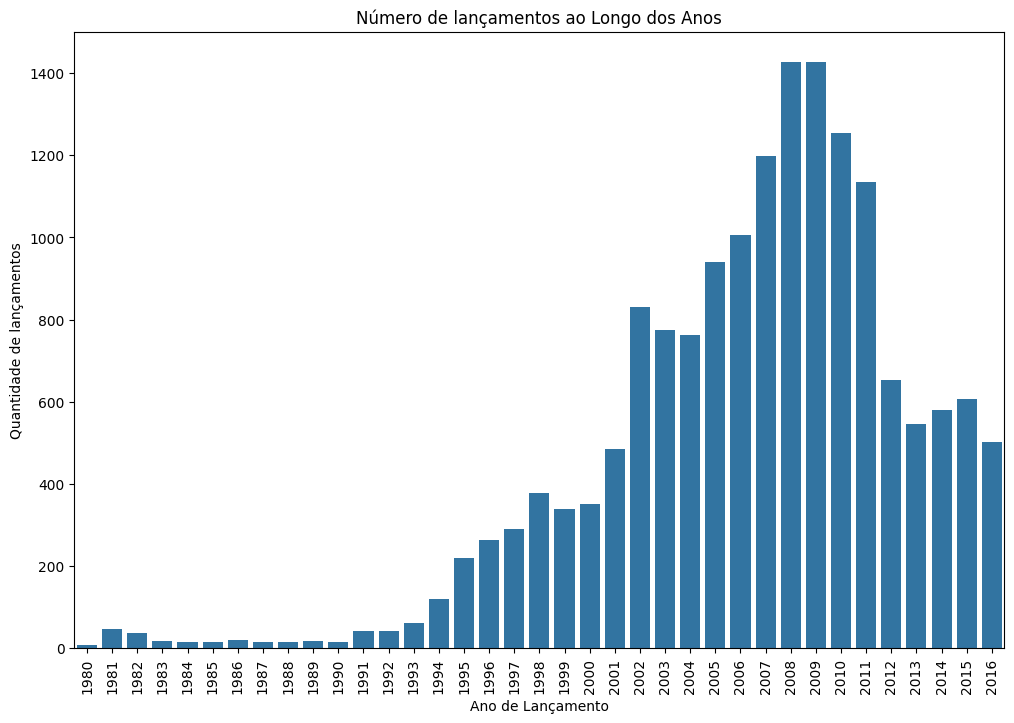

In [26]:
# Agrupamento de jogos por ano de lançamento
games_per_year = df.groupby('year_of_release', as_index=False).size()
games_per_year.columns = ['year_of_release', 'quantity']
print(games_per_year)

plt.figure(figsize=(12, 8))
sns.barplot(x="year_of_release", y = "quantity", data=games_per_year)
plt.title('Número de lançamentos ao Longo dos Anos')
plt.ylabel('Quantidade de lançamentos')
plt.xlabel('Ano de Lançamento')
plt.xticks(rotation=90)
plt.show()

#### 3.1.2 Conclusions || Conclusões
- Nota-se um aumento considerável na quantidade de jogos lançados ao longo dos anos
- De 2011 para 2012 houve uma queda, que deve ser analisada mais a fundo

### 3.2 Sales by Platform || Vendas por Plataforma

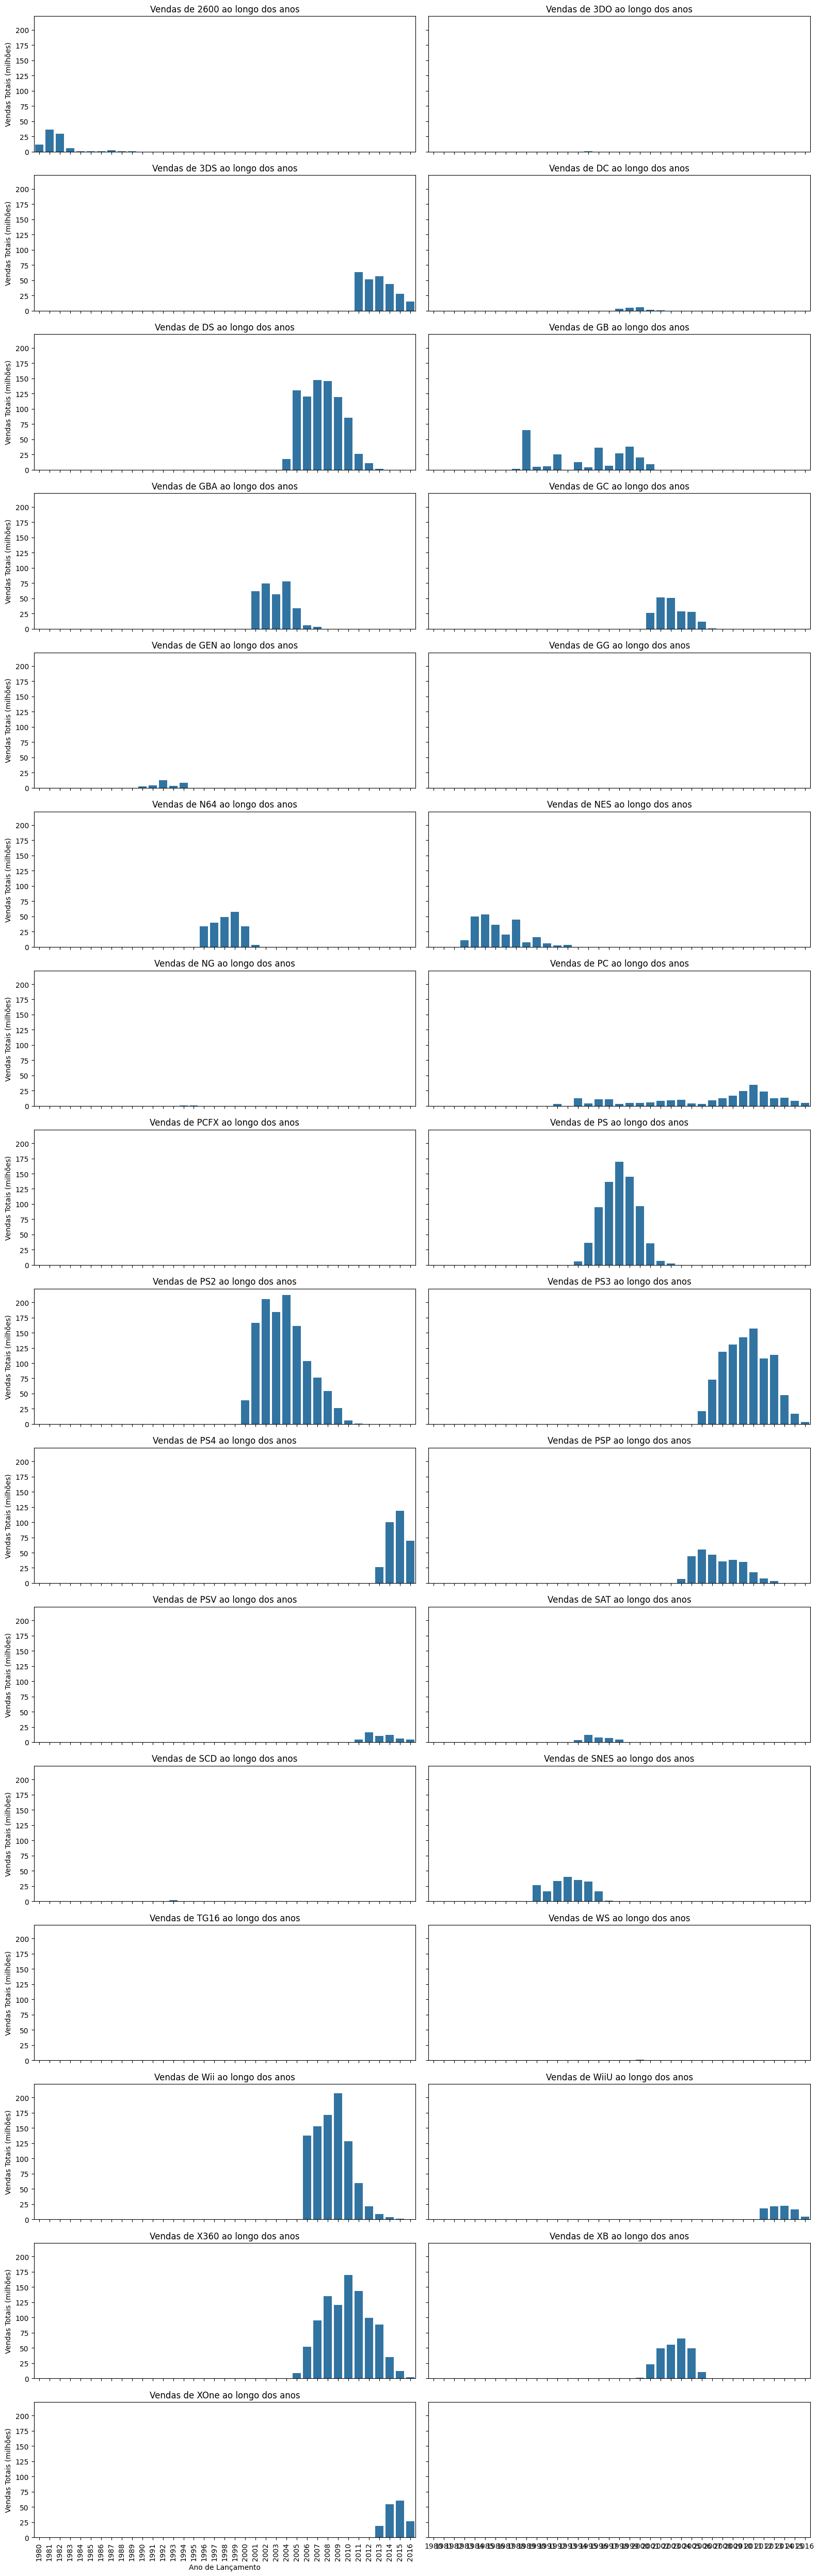

Plataformas que costumavam ser populares, mas agora não têm vendas:
 CategoricalIndex(['2600', '3DO', 'DC', 'GB', 'GBA', 'GC', 'GEN', 'GG', 'N64',
                  'NES', 'NG', 'PCFX', 'PS', 'SAT', 'SCD', 'SNES', 'TG16',
                  'WS', 'XB'],
                 categories=['2600', '3DO', '3DS', 'DC', ..., 'WiiU', 'X360', 'XB', 'XOne'], ordered=False, dtype='category', name='platform')


           min   max  duration
platform                      
GG        1992  1992         0
PCFX      1996  1996         0
TG16      1995  1995         0
3DO       1994  1995         1
SCD       1993  1994         1
WS        1999  2001         2
NG        1993  1996         3
XOne      2013  2016         3
PS4       2013  2016         3
GEN       1990  1994         4
WiiU      2012  2016         4
PSV       2011  2016         5
3DS       2011  2016         5
SAT       1994  1999         5
N64       1996  2002         6
GC        2001  2007         6
GBA       2000  2007         7
XB        200

In [27]:
# Agrupando as plataformas com maiores vendas
platform_sales = df.groupby('platform', observed=True)['total_sales'].sum().sort_values(ascending=False)

platform_sales_year = df.groupby(['year_of_release', 'platform'], observed=True)['total_sales'].sum().unstack()

# Transformando o dataframe em formato longo para Seaborn
platform_sales_year = platform_sales_year.reset_index().melt(id_vars="year_of_release", var_name="platform", value_name="total_sales")

n_platforms = platform_sales_year['platform'].nunique()
# Criando os subplots
fig, axes = plt.subplots(nrows=ceil(n_platforms/2), ncols=2, figsize=(16, 50), sharex=True, sharey=True)
axes = axes.flatten()

# Gerando um subplot para cada plataforma
for i, platform in enumerate(platform_sales_year['platform'].unique()):
    # Filtrando os dados para a plataforma atual
    platform_data = platform_sales_year[platform_sales_year['platform'] == platform]
    
    # Criando o gráfico de linhas para a plataforma
    sns.barplot(x="year_of_release", y="total_sales", data=platform_data, ax=axes[i])
    
    # Definindo o título para cada subplot
    axes[i].set_title(f"Vendas de {platform} ao longo dos anos")
    axes[i].set_ylabel("Vendas Totais (milhões)")
    axes[i].set_xlabel("Ano de Lançamento")
    axes[i].tick_params(axis='x', rotation=90)


plt.tight_layout()
plt.show()


# Plataformas populares que não têm vendas atuais
recent_years = df['year_of_release'].max()
old_platforms = df[df['year_of_release'] < recent_years - 5].groupby('platform', observed=True)['total_sales'].sum()
recent_platforms = df[df['year_of_release'] >= recent_years - 5].groupby('platform', observed=True)['total_sales'].sum()

# Encontrando plataformas sem vendas recentes
platforms_no_sales_recent = old_platforms.index.difference(recent_platforms.index)
print("Plataformas que costumavam ser populares, mas agora não têm vendas:\n", platforms_no_sales_recent)
print()
print()

# Tempo para plataformas desaparecerem e novas surgirem
platform_lifespan = df.groupby('platform', observed=True)['year_of_release'].agg(['min', 'max'])
platform_lifespan['duration'] = platform_lifespan['max'] - platform_lifespan['min']
print(platform_lifespan.sort_values(by='duration'))

#### 3.2.1 Conclusions || Conclusões
Após observar os números, e os gráficos, percebemos as tais "Gerações" dos videogames. Pode-se perceber plataformas novas surgindo, enquanto outras atingem o auge, e com novas plataformas, acabam perdendo espaço no mercado. Uma coisa a se notar é que esse ciclo foi aumentando a duração (com algumas exceções), ou seja antes podíamos ver um ciclo de 2,3 até 5 anos, porém nos anos 2000 esse tempo passou a ser de no mínimo 5 anos. 

Decidi classificar as plataformas como:
- Obsoletas - Não possuem vendas significativas recentes (pelo menos nos últimos 10 anos), ou já passaram do auge e "morreram"
- Meia-vida - Já passaram do auge das vendas, mas ainda constam algumas vendas recentes e podem servir para a análise
- Em ascensão - Plataformas novas, que ainda não chegaram no auge, e definitivamente estarão chegando ao seu auge a partir de 2017
A única exceção a essa classificação é o PC, que se mantém praticamente constante em mais de 30 anos

GG    - Obsoleta

PCFX  - Obsoleta

TG16  - Obsoleta

3DO   - Obsoleta

SCD   - Obsoleta

WS    - Obsoleta

NG    - Obsoleta

XOne  - Em ascensão

PS4   - Em ascensão

GEN   - Obsoleta

WiiU  - Em ascensão

PSV   - Meia-vida

3DS   - Meia-vida

SAT   - Obsoleta

N64   - Obsoleta

GC    - Obsoleta

GBA   - Obsoleta

XB    - Obsoleta

SNES  - Obsoleta

2600  - Obsoleta

PS    - Obsoleta

PS3   - Meia-vida

Wii   - Meia-vida

DC    - Obsoleta

PS2   - Meia-vida

NES   - Obsoleta

X360  - Meia-vida

PSP   - Meia-vida

GB    - Obsoleta

DS    - Meia-vida

PC    - PC

### 3.3 Selecting Data for Analysis || Selecionando dados para análise

In [28]:
# Escolhendo plataformas para manter na análise
platforms_to_keep = ['PSV', '3DS', 'PS3', 'Wii', 'PS2', 'X360', 'PSP', 'DS', 'XOne', 'PS4', 'WiiU', 'PC']

# Filtrando por plataforma, e apenas dados depois de 2000 até 2015
df_filtered = df[(df['platform'].isin(platforms_to_keep)) & (df['year_of_release'] >= 2000) & (df['year_of_release'] < 2016)]
print_info(df_filtered)


---------------------

<class 'pandas.core.frame.DataFrame'>
Index: 11408 entries, 0 to 16711
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             11408 non-null  object  
 1   platform         11408 non-null  category
 2   year_of_release  11408 non-null  int64   
 3   genre            11408 non-null  category
 4   na_sales         11408 non-null  float64 
 5   eu_sales         11408 non-null  float64 
 6   jp_sales         11408 non-null  float64 
 7   other_sales      11408 non-null  float64 
 8   critic_score     6691 non-null   float64 
 9   user_score       6691 non-null   float64 
 10  rating           11408 non-null  category
 11  total_sales      11408 non-null  float64 
dtypes: category(3), float64(7), int64(1), object(1)
memory usage: 927.0+ KB

---------------------
---------------------

                         name platform  year_of_release       genre  na_sales  \
0         

#### 3.3.1 Conclusions || Conclusões

Decidi manter apenas as plataformas que classifiquei como 'meia vida', e as 'em ascensão'. Decidi também, apenas para garantir cortar todos os dados anteriores a 2000. E como os dados são de 2016, e a análise é para 2017, e como os dados são significativamente diferentes do esperado, suponho que os dados de 2016 estão incompletos. Portanto para não comprometer a análise, irei descartá-los também.

### 3.4 Sales by current Platform || Venda por plataformas atuais


---------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   platform       12 non-null     category
 1   total_sales    12 non-null     float64 
 2   average_sales  12 non-null     float64 
dtypes: category(1), float64(2)
memory usage: 1.6 KB

---------------------
---------------------

  platform  total_sales  average_sales
0      PS2      1233.56       0.579953
1     X360       959.72       0.787301
2      PS3       927.74       0.731656
3      Wii       891.00       0.693385
4       DS       802.76       0.378660
5      PSP       290.33       0.243157
6      PS4       244.89       1.074079
7      3DS       242.67       0.520751
8       PC       200.82       0.232431
9     XOne       133.17       0.832312

---------------------
---------------------

       platform  total_sales  average_sales
count        12    12.000000   

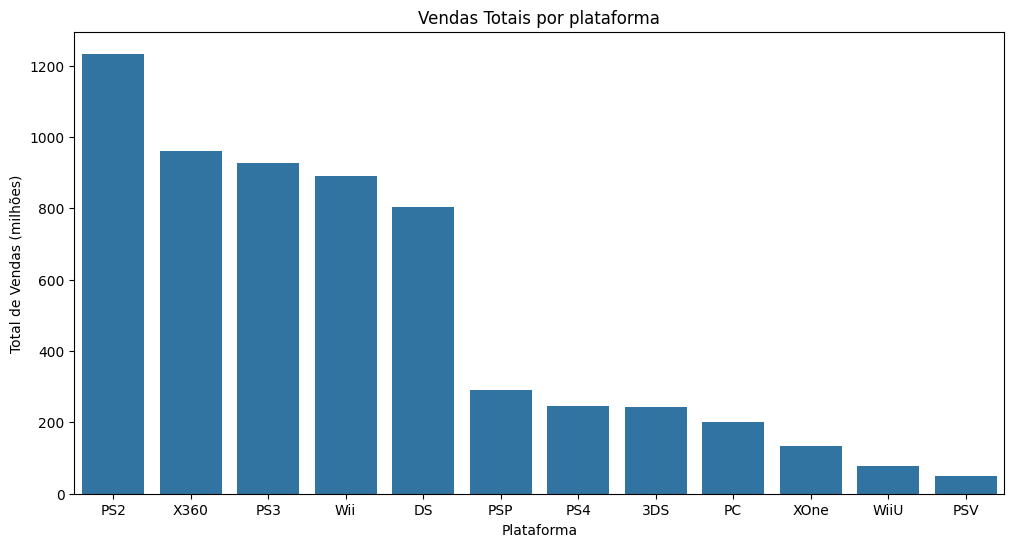

In [29]:
platform_sales = df_filtered.groupby('platform', observed=True).agg(
    total_sales=('total_sales', 'sum'),
    average_sales=('total_sales', 'mean')
).sort_values(by='total_sales', ascending=False).reset_index()
print_info(platform_sales)

plt.figure(figsize=(12, 6))

sns.barplot(y='total_sales', x = 'platform', data=platform_sales, legend=False, order=platform_sales["platform"])
plt.title('Vendas Totais por plataforma')
plt.xlabel('Plataforma')
plt.ylabel('Total de Vendas (milhões)')
plt.show()


#### 3.4.1 Conclusions || Conclusões
Ao observar o gráfico apresentado, em conjunto com o gráfico do item 3.2, nota-se que:
- Atualmente PS3 e XB360 são as plataformas com mais vendas recentes, e que estão em queda.
- PS2, XB, Wii e DS, são plataformas que finalizaram um ciclo de auge seguida pela queda (devido provavelmente a chegada da "nova geração").
- PS4 e XBOne São as plataformas mais novas, e que estão em ascensão no mercado, sendo sim uma das plataformas mais promissoras.
- PC é sempre uma constante, não aparece como sendo um destaque nas vendas, porém não passa pelo ciclo, mantendo-se estável ao passar dos anos.

### 3.5 Global Sales || Vendas Globais

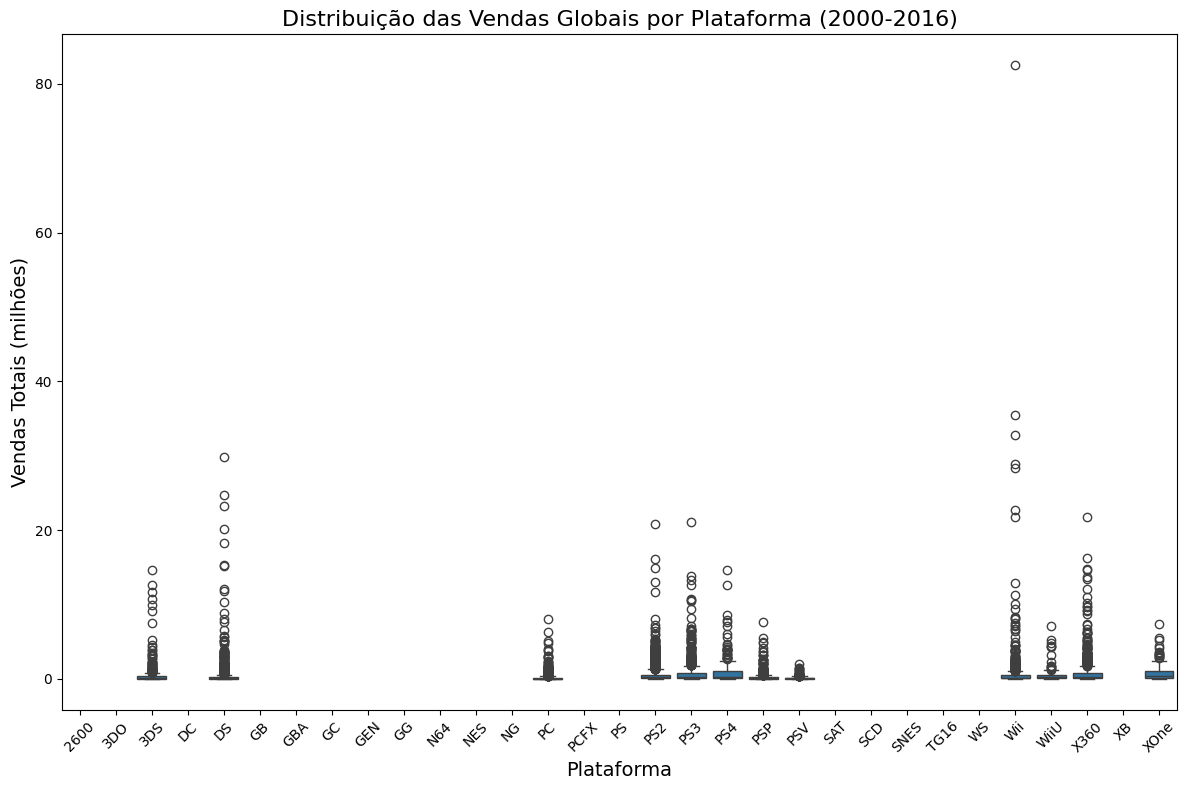

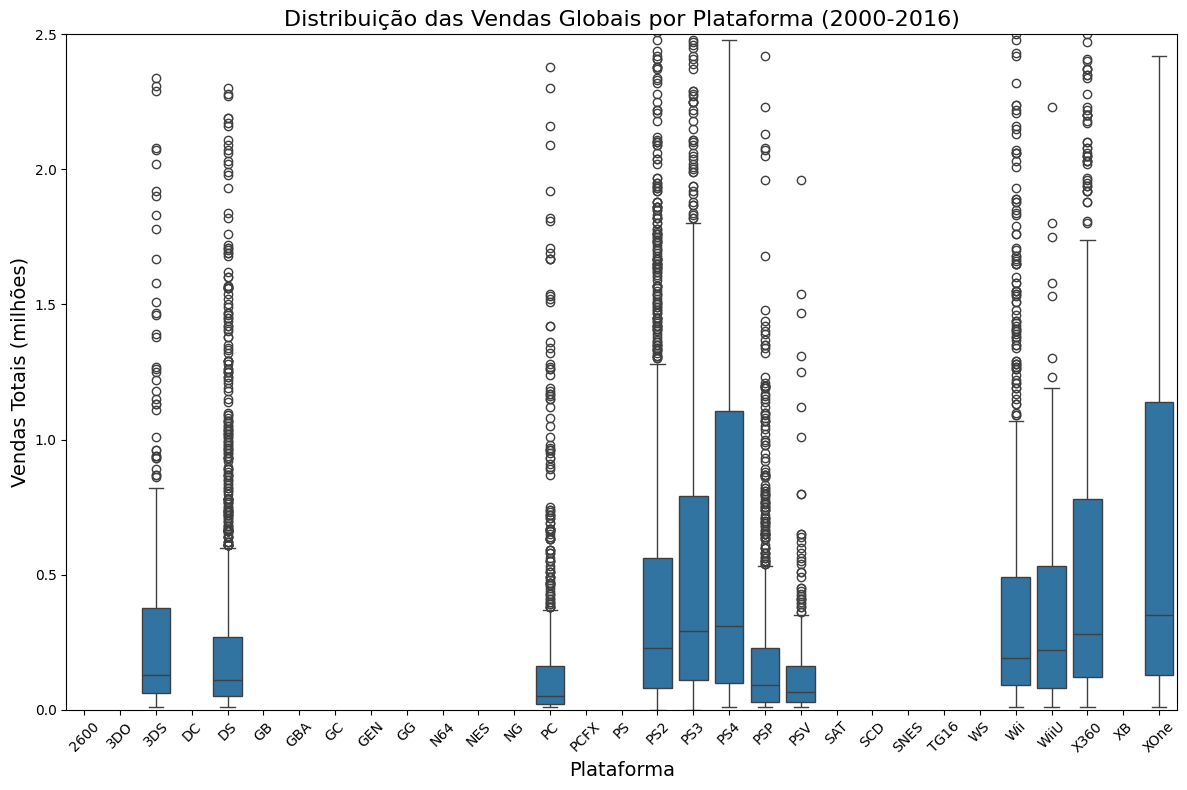

In [30]:
# Criar o boxplot
plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(x='platform', y='total_sales', data=df_filtered, )

# Adicionar título e rótulos
plt.title('Distribuição das Vendas Globais por Plataforma (2000-2016)', fontsize=16)
plt.xlabel('Plataforma', fontsize=14)
plt.ylabel('Vendas Totais (milhões)', fontsize=14)

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Mostrar o gráfico
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
boxplot = sns.boxplot(x = 'platform', y='total_sales', data=df_filtered,)

# Adicionar título e rótulos
plt.title('Distribuição das Vendas Globais por Plataforma (2000-2016)', fontsize=16)
plt.xlabel('Plataforma', fontsize=14)
plt.ylabel('Vendas Totais (milhões)', fontsize=14)

# Rotacionar os rótulos do eixo x para melhor legibilidade
plt.xticks(rotation=45)

# Definir limites para melhor visualização
plt.ylim(0,2.5)

# Mostrar o gráfico
plt.tight_layout()
plt.show()


#### 3.5.1 Conclusions || Conclusões

Observando a distribuição das vendas totais por plataforma, nota-se que as plataformas que já passaram pelo ciclo, ou que estão finalizando o ciclo tendem a ter um espalhamento menor do que as que estão começando um ciclo. Uma coisa que também é muito notável é a alta presença de outliers, em praticamente todas as plataformas, o que indica que possivelmente alguns títulos pontuais fazem grandes vendas, saindo do padrão de cada plataforma.

### 3.6 Score impact on Sales || Impacto das avaliações nas vendas

In [31]:
# Tirando avaliações nulas do dataframe
df_score_filtered = df_filtered.dropna(subset=['critic_score', 'user_score', 'total_sales'])

# Selecionando a plataforma que mais possui avaliações
platform_game_count = df_score_filtered['platform'].value_counts().reset_index()
platform_game_count.columns = ['platform', 'game_count']
top_platform = platform_game_count.loc[platform_game_count['game_count'].idxmax()]['platform']
print(top_platform)
df_score_filtered = df_score_filtered[df_score_filtered['platform']==top_platform]

# criando uma coluna a mais no df, que é a coluna de avaliações dos usuários, multiplicado por 10, para estar na mesma escala dos críticos
df_score_filtered['user_score_norm'] = df_score_filtered['user_score'].apply(lambda x: x * 10)

# Calculando a média entre críticos e usuários
df_score_filtered['average_score'] = df_score_filtered.apply(lambda x: (x['user_score_norm'] + x['critic_score']) / 2, axis=1)

print_info(df_score_filtered)

PS2

---------------------

<class 'pandas.core.frame.DataFrame'>
Index: 1399 entries, 17 to 16591
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   name             1399 non-null   object  
 1   platform         1399 non-null   category
 2   year_of_release  1399 non-null   int64   
 3   genre            1399 non-null   category
 4   na_sales         1399 non-null   float64 
 5   eu_sales         1399 non-null   float64 
 6   jp_sales         1399 non-null   float64 
 7   other_sales      1399 non-null   float64 
 8   critic_score     1399 non-null   float64 
 9   user_score       1399 non-null   float64 
 10  rating           1399 non-null   category
 11  total_sales      1399 non-null   float64 
 12  user_score_norm  1399 non-null   float64 
 13  average_score    1399 non-null   float64 
dtypes: category(3), float64(9), int64(1), object(1)
memory usage: 137.6+ KB

---------------------
----------------

In [32]:
correlation_matrix = df_score_filtered[['critic_score', 'user_score', 'average_score', 'total_sales']].corr()
print(correlation_matrix)

               critic_score  user_score  average_score  total_sales
critic_score       1.000000    0.616980       0.896977     0.376591
user_score         0.616980    1.000000       0.901322     0.201435
average_score      0.896977    0.901322       1.000000     0.320428
total_sales        0.376591    0.201435       0.320428     1.000000


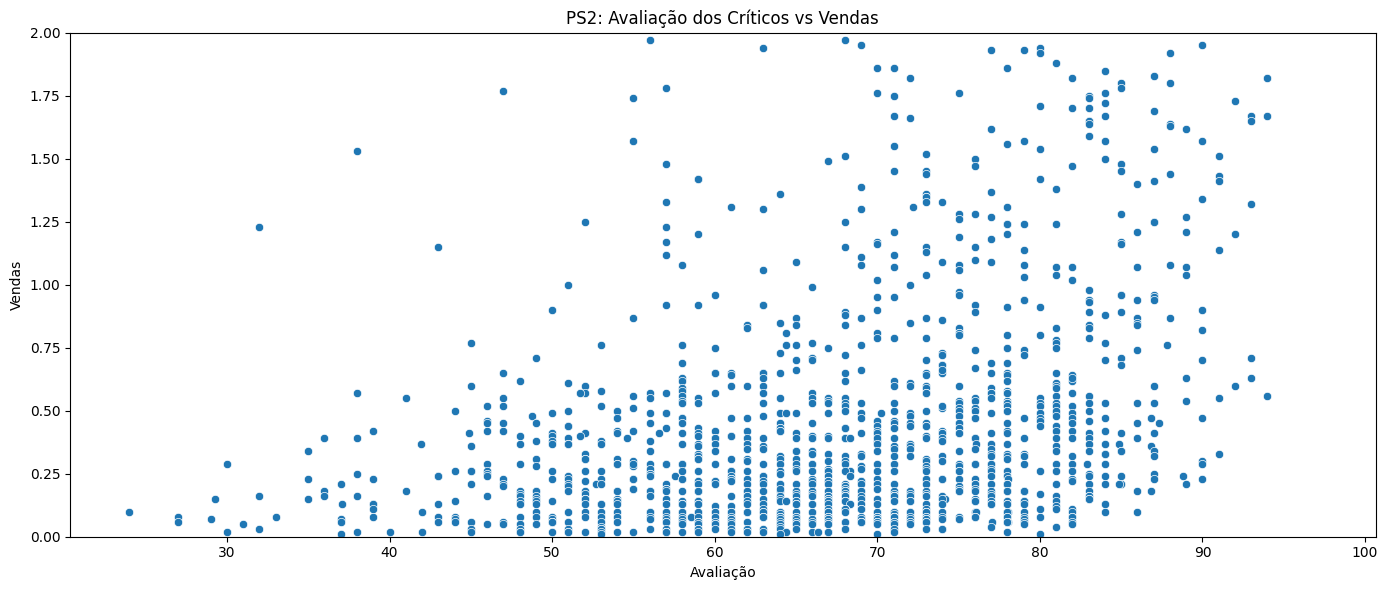

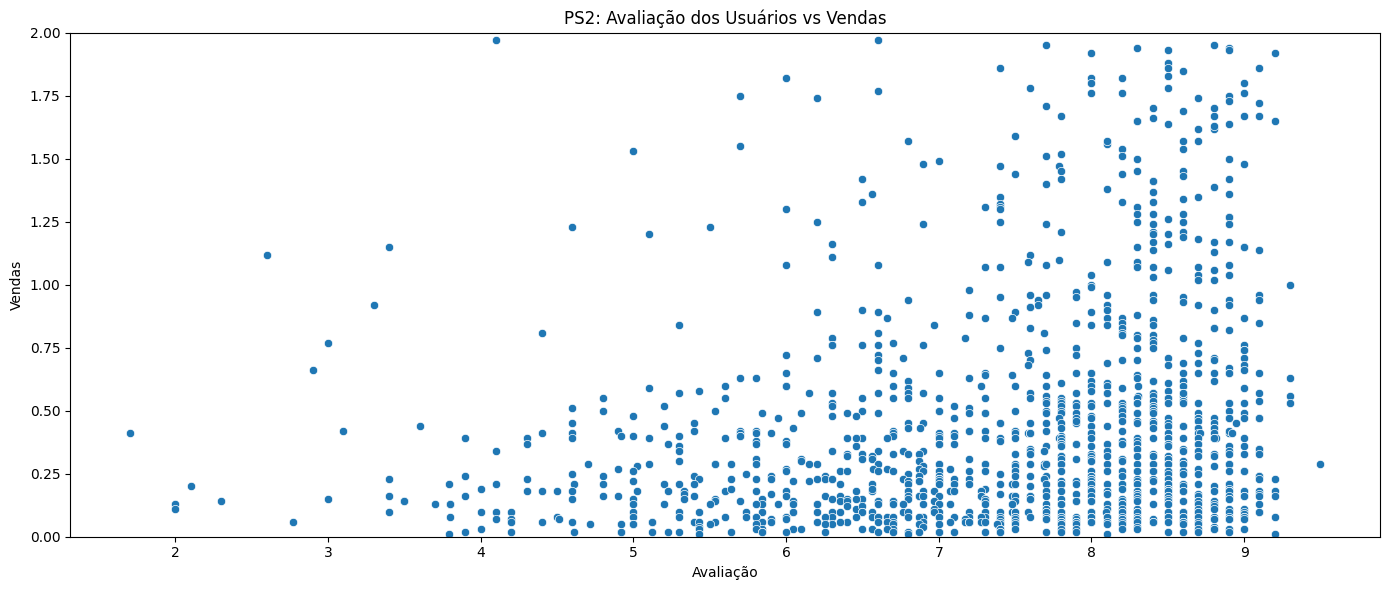

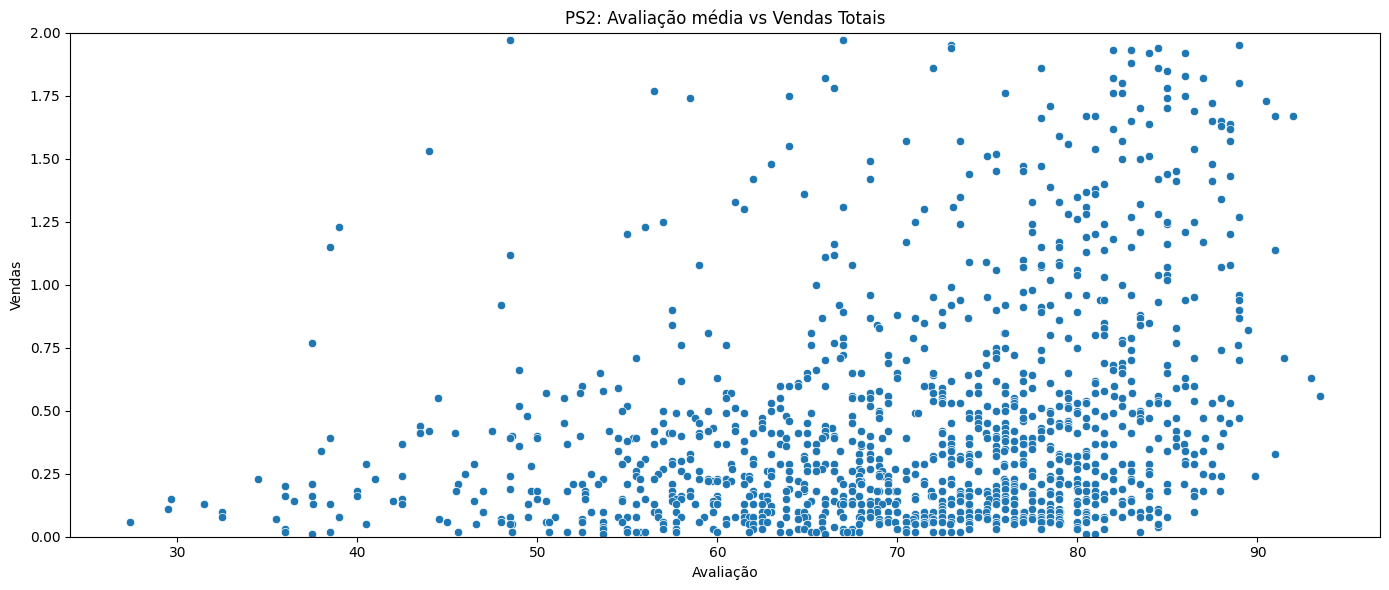

In [33]:
plt.figure(figsize=(14, 6))


sns.scatterplot(data=df_score_filtered, x='critic_score', y='total_sales')
plt.title(f'{top_platform}: Avaliação dos Críticos vs Vendas')
plt.xlabel('Avaliação')
plt.ylabel('Vendas')
plt.ylim(0,2)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 6))
sns.scatterplot(data=df_score_filtered, x='user_score', y='total_sales')
plt.title(f'{top_platform}: Avaliação dos Usuários vs Vendas')
plt.xlabel('Avaliação')
plt.ylabel('Vendas')
plt.ylim(0,2)
plt.tight_layout()
plt.show()


plt.figure(figsize=(14, 6))
sns.scatterplot(data=df_score_filtered, x='average_score', y='total_sales')
plt.title(f'{top_platform}: Avaliação média vs Vendas Totais')
plt.xlabel('Avaliação')
plt.ylabel('Vendas')
plt.ylim(0,2)
plt.tight_layout()
plt.show()

#### 3.6.1 Conclusions || Conclusões

A matriz de correlação sugere uma correlação muito fraca, porém ao observar os gráficos, nota-se uma leve tendência de quanto mais altas as notas, maiores as vendas, mas podemos ver que ainda assim não são maioria. Poderíamos dizer que no máximo, quanto mais alta a avaliação, maiores são as chances de conseguir uma alta venda, mas ainda assim nada garantido.

### 3.7 Sales by Genre || Vendas por Gênero

           genre  total_sales  average_sales  game_count
0         Action      1310.82       0.540544        2425
10        Sports       974.09       0.655511        1486
8        Shooter       785.27       0.928215         846
3           Misc       639.30       0.472855        1352
7   Role-Playing       589.62       0.541930        1088
6         Racing       470.35       0.654172         719
4       Platform       356.95       0.868491         411
9     Simulation       310.28       0.451645         687
2       Fighting       256.01       0.527856         485
1      Adventure       150.62       0.146660        1027
5         Puzzle       117.94       0.287659         410
11      Strategy        92.56       0.196102         472


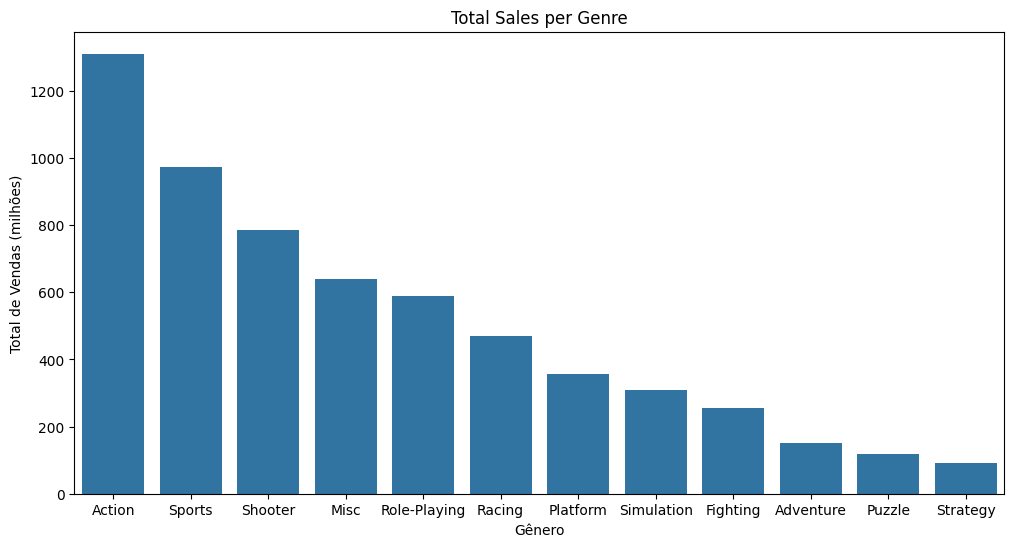

In [34]:
genre_sales = df_filtered.groupby('genre', observed=True).agg(
    total_sales=('total_sales', 'sum'),
    average_sales=('total_sales', 'mean'),
    game_count=('name', 'count')
).reset_index()

genre_sales_sorted = genre_sales.sort_values(by='total_sales', ascending=False)

print(genre_sales_sorted)

plt.figure(figsize=(12, 6))

sns.barplot(y='total_sales', x = 'genre', data=genre_sales_sorted, legend=False, order=genre_sales_sorted["genre"])
plt.title('Total Sales per Genre')
plt.xlabel('Gênero')
plt.ylabel('Total de Vendas (milhões)')
plt.show()

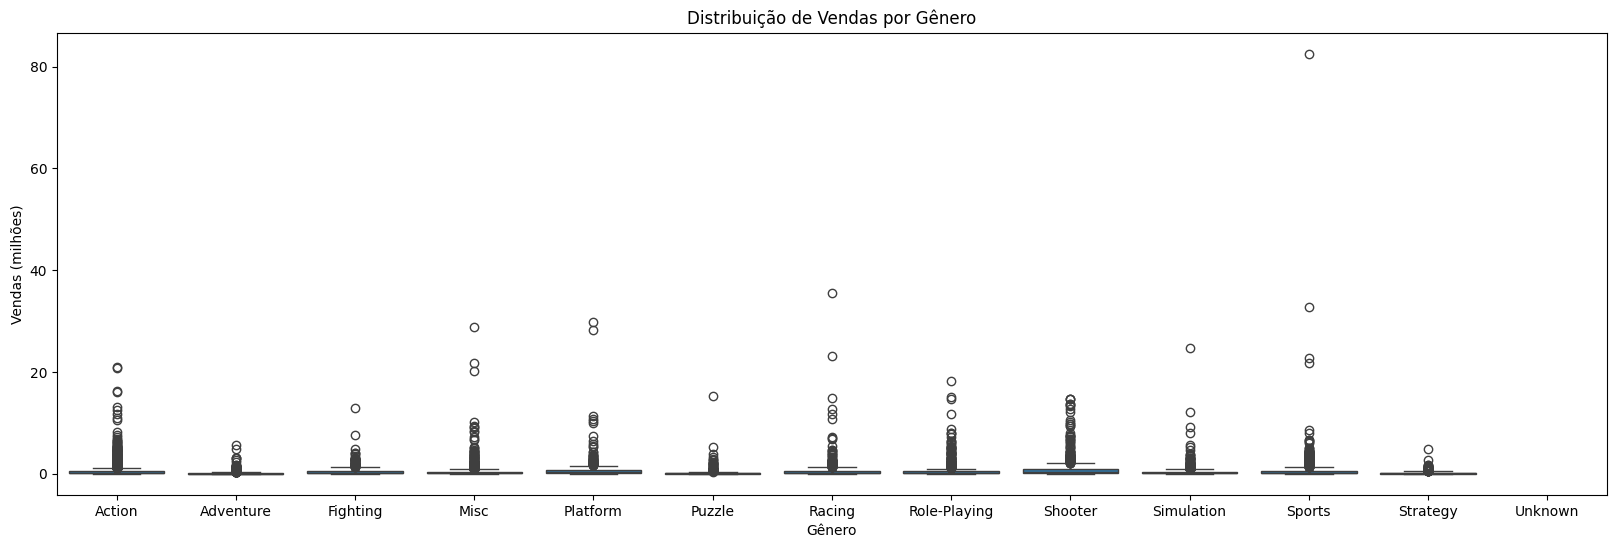

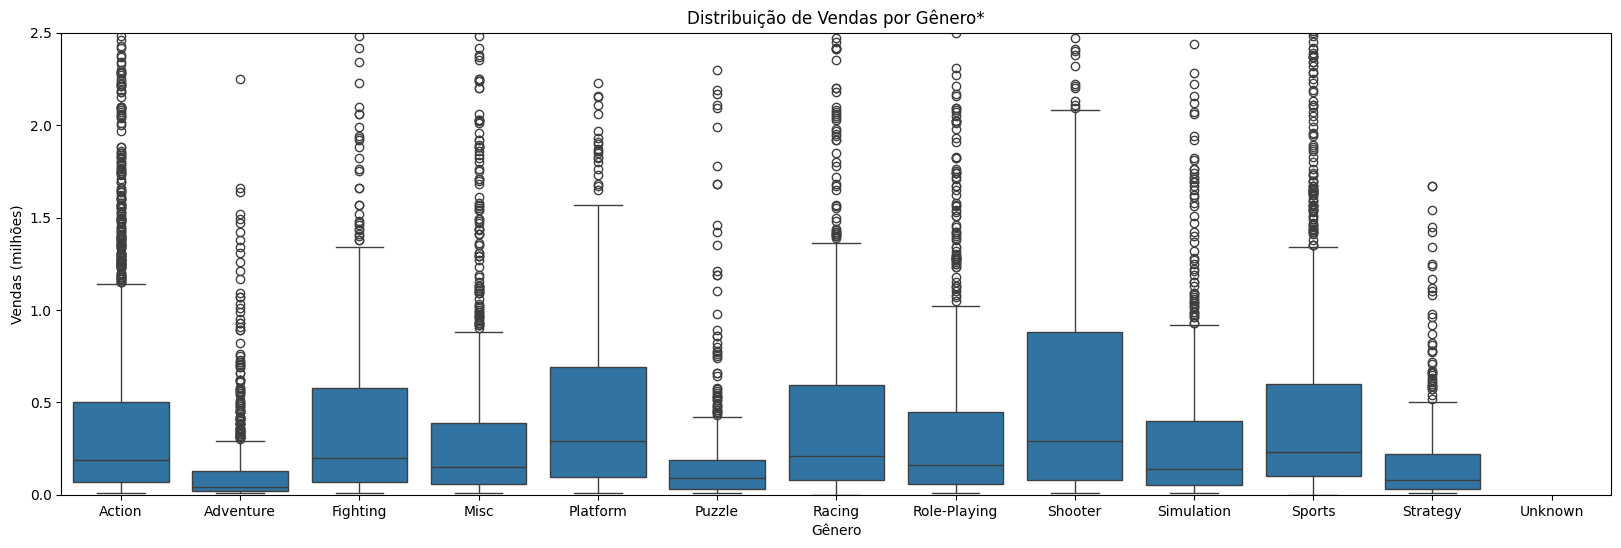

In [35]:
# Step 4: Boxplot for sales distribution by genre
plt.figure(figsize=(20, 6))
sns.boxplot(y='total_sales',  x='genre', data=df_filtered, )
plt.title('Distribuição de Vendas por Gênero')
plt.xlabel('Gênero')
plt.ylabel('Vendas (milhões)')
plt.show()

plt.figure(figsize=(20, 6))
sns.boxplot(y='total_sales',  x='genre', data=df_filtered,)
plt.title('Distribuição de Vendas por Gênero*')
plt.xlabel('Gênero')
plt.ylabel('Vendas (milhões)')
plt.ylim(0,2.5)
plt.show()

#### 3.7.1 Conclusions || Conclusões

Podemos notar a clara preferência mundial para jogos de ação, tiro e esportes. Mas esses jogos também possuem uma alta variabilidade nas vendas, isto é, em um jogo dentro dessas categorias pode ser complicado prever o quanto ele vai vender, devido a altíssima variabilidade, e grande presença de outliers, diferentemente dos gêneros menos jogados, que possuem uma variabilidade muito mais baixa, e menos outliers, ou seja, apesar do lucro ser potencialmente menor, é muito mais fácil prever o comportamento de um lançamento destes gêneros

## Step 4 || Etapa 4

### 4.1 Platform by Region || Plataforma por Região

In [36]:
# Agrupando vendas por plataforma, e separando por região
platform_sales_na = df_filtered.groupby('platform', observed=True)['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head(5)
platform_sales_eu = df_filtered.groupby('platform', observed=True)['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head(5)
platform_sales_jp = df_filtered.groupby('platform', observed=True)['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head(5)

# Mostrando as 5 plataformas com mais vendas em cada região
print("Top 5 Plataformas em NA:\n", platform_sales_na)
print()
print("-----------------------------")
print()
print("Top 5 Plataformas em EU:\n", platform_sales_eu)
print()
print("-----------------------------")
print()
print("Top 5 Plataformas em JP:\n", platform_sales_jp)
print()
print()

# Somando as vendas em cada Região
total_na_sales = df_filtered['na_sales'].sum()
total_eu_sales = df_filtered['eu_sales'].sum()
total_jp_sales = df_filtered['jp_sales'].sum()

# Calculando a porcentagem de vendas em cada região (agrupados por plataforma)
platform_sales_na['market_share_na'] = (platform_sales_na['na_sales'] / total_na_sales) * 100
platform_sales_eu['market_share_eu'] = (platform_sales_eu['eu_sales'] / total_eu_sales) * 100
platform_sales_jp['market_share_jp'] = (platform_sales_jp['jp_sales'] / total_jp_sales) * 100

# Mostrando as informações calculadas
print(platform_sales_na)
print()
print("-----------------------------")
print()
print(platform_sales_eu)
print()
print("-----------------------------")
print()
print(platform_sales_jp)


Top 5 Plataformas em NA:
    platform  na_sales
10     X360    595.05
3       PS2    572.92
8       Wii    486.81
4       PS3    389.46
1        DS    380.31

-----------------------------

Top 5 Plataformas em EU:
    platform  eu_sales
3       PS2    332.63
4       PS3    325.95
10     X360    267.61
8       Wii    258.21
1        DS    188.41

-----------------------------

Top 5 Plataformas em JP:
   platform  jp_sales
1       DS    175.00
3      PS2    137.54
0      3DS     92.59
4      PS3     78.11
6      PSP     76.14


   platform  na_sales  market_share_na
10     X360    595.05        20.608363
3       PS2    572.92        19.841935
8       Wii    486.81        16.859688
4       PS3    389.46        13.488166
1        DS    380.31        13.171274

-----------------------------

   platform  eu_sales  market_share_eu
3       PS2    332.63        18.445014
4       PS3    325.95        18.074594
10     X360    267.61        14.839522
8       Wii    258.21        14.318273
1    

#### 4.1.1. Conclusions || Conclusões
As plataformas de maior sucesso diferem bastante entre cada região, tanto em ordem, como nas plataformas em si. Um detalhe a se notar, é que na região do Japão as 5 maiores plataformas são justamente de empresas japonesas (Nintendo e Sony). Enquanto nos América do Norte, a plataforma líder é o Xbox 360, que é de uma empresa Norte Americana.

### 4.2 Genre by Region || Gênero por Região 

In [37]:
# Agrupando vendas por gênero, e ordenando para pegar apenas os 5 maiores
genre_sales_na = df_filtered[df_filtered["genre"]!="Unknown"].groupby('genre', observed=True)['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False).head(5)
genre_sales_eu = df_filtered[df_filtered["genre"]!="Unknown"].groupby('genre', observed=True)['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False).head(5)
genre_sales_jp = df_filtered[df_filtered["genre"]!="Unknown"].groupby('genre', observed=True)['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False).head(5)

# Mostrando os 5 maiores gêneros em vendas
print("Top 5 Gêneros em NA:\n", genre_sales_na)
print()
print("-----------------------------")
print()
print("Top 5 Gêneros em EU:\n", genre_sales_eu)
print()
print("-----------------------------")
print()
print("Top 5 Gêneros em JP:\n", genre_sales_jp)

Top 5 Gêneros em NA:
            genre  na_sales
0         Action    623.61
10        Sports    490.36
8        Shooter    415.30
3           Misc    316.56
7   Role-Playing    223.84

-----------------------------

Top 5 Gêneros em EU:
       genre  eu_sales
0    Action    404.95
10   Sports    298.38
8   Shooter    256.43
3      Misc    177.61
6    Racing    166.09

-----------------------------

Top 5 Gêneros em JP:
            genre  jp_sales
7   Role-Playing    190.53
0         Action    116.47
3           Misc     76.35
10        Sports     66.88
4       Platform     39.62


#### 4.2.1 Conclusions || Conclusões

Aqui, já podemos perceber que "na" e "eu", apresentam preferências por gênero muito próximas, (ação esportes e tiro), sendo apenas o japão um pouco diferente nos gêneros mais vendidos (role-play, ação).

## 4.3 Rating by Region || Classificação por Região

Vendas por Classificação Indicativa em NA:
   rating  na_sales
0      E    987.61
3      M    658.37
5      T    583.63
1   E10+    328.72
2     EC      1.44
4     RP      0.00

-----------------------------

Vendas por Classificação Indicativa em EU:
   rating  eu_sales
0      E    578.52
3      M    438.77
5      T    340.69
1   E10+    175.67
2     EC      0.09
4     RP      0.03

-----------------------------

Vendas por Classificação Indicativa em JP:
   rating  jp_sales
0      E    159.50
5      T    118.40
3      M     55.22
1   E10+     38.82
2     EC      0.00
4     RP      0.00


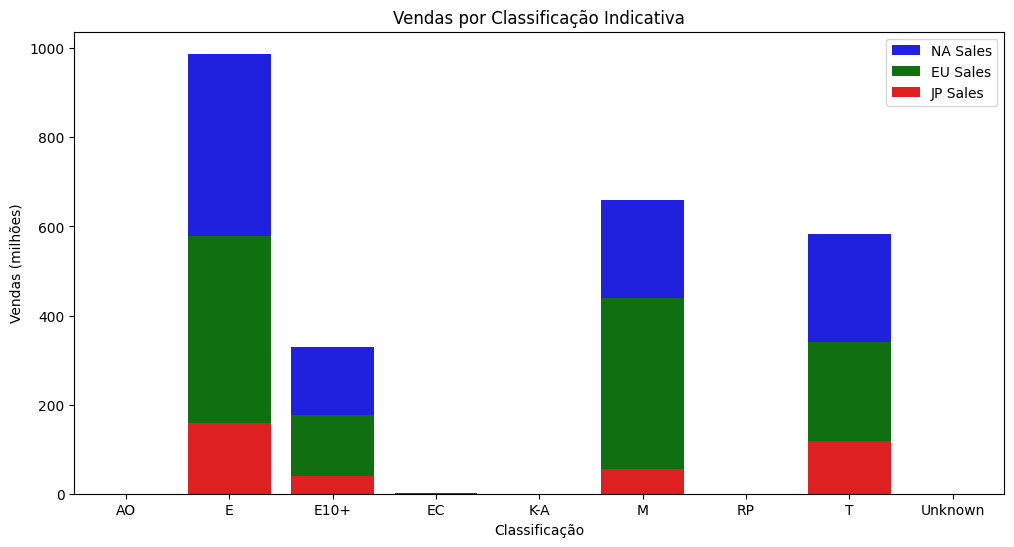

In [38]:
# Step 1: Aggregate sales by ESRB rating for each region
rating_sales_na = df_filtered[df_filtered["rating"]!="Unknown"].groupby('rating', observed=True)['na_sales'].sum().reset_index().sort_values(by='na_sales', ascending=False)
rating_sales_eu = df_filtered[df_filtered["rating"]!="Unknown"].groupby('rating', observed=True)['eu_sales'].sum().reset_index().sort_values(by='eu_sales', ascending=False)
rating_sales_jp = df_filtered[df_filtered["rating"]!="Unknown"].groupby('rating', observed=True)['jp_sales'].sum().reset_index().sort_values(by='jp_sales', ascending=False)

# Step 2: Display sales by ESRB rating for each region
print("Vendas por Classificação Indicativa em NA:\n", rating_sales_na)
print()
print("-----------------------------")
print()
print("Vendas por Classificação Indicativa em EU:\n", rating_sales_eu)
print()
print("-----------------------------")
print()
print("Vendas por Classificação Indicativa em JP:\n", rating_sales_jp)

# Step 3: Compare the distribution of sales by ESRB rating
plt.figure(figsize=(12, 6))

# Plot sales by ESRB rating for NA, EU, and JP
sns.barplot(x='rating', y='na_sales', data=rating_sales_na, color='blue', label='NA Sales')
sns.barplot(x='rating', y='eu_sales', data=rating_sales_eu, color='green', label='EU Sales')
sns.barplot(x='rating', y='jp_sales', data=rating_sales_jp, color='red', label='JP Sales')

plt.title('Vendas por Classificação Indicativa')
plt.ylabel('Vendas (milhões)')
plt.xlabel('Classificação')
plt.legend()
plt.show()

#### 4.3.1 Conclusions || Conclusões
Aqui já percebemos que a classificação não interfere nas vendas nas diferentes regiões. Apenas podemos perceber a preferência global por jogos E, M e T.

## Step 5 || Etapa 5

### 5.1 Hipótese 1: As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas
Hipótese nula (H0): A média das classificações de usuários do Xbox One é igual à do PC.

Hipótese alternativa (H1): A média das classificações de usuários do Xbox One é diferente da do PC.

In [39]:
# Filtrando dados para Xbox One e PC
xbox_one_scores = df_filtered[df_filtered['platform'] == 'XOne']['user_score'].dropna()
pc_scores = df_filtered[df_filtered['platform'] == 'PC']['user_score'].dropna()

# Fazendo o teste de levene, para checar a possibilidade de usar mesmas variâncias
levene_stat, levene_p_value = st.levene(xbox_one_scores, pc_scores)
levene_alpha = 0.05

# Avaliando a significância apresentada pelo teste de levene
if levene_p_value < levene_alpha:
    print(f"O teste de Levene leva a crer que as variâncias são diferentes. (p-valor = {levene_p_value}).")
    equal_var = False
else:
    print(f"O teste de Levene leva a crer que as variâncias são iguais (p-valor = {levene_p_value}). ")
    equal_var = True 

# Fazendo o t-test
t_stat, p_value = st.ttest_ind(xbox_one_scores, pc_scores, equal_var=equal_var)

alpha = 0.05

# Checando significância dos resultados
if p_value < alpha:
    print(f"Rejeitamos a hipótese nula.\n As avaliações de usuário (user_score) de PC e XboxOne são significativamente diferentes (p-valor = {p_value}).")
else:
    print(f"Falhamos em rejeitar a hipótese nula.\n Não há evidências estatísticas para sustentar a hipótese de que as avaliações de usuários (user_score) de PC e XboxOne são diferentes (p-valor = {p_value}).")


O teste de Levene leva a crer que as variâncias são iguais (p-valor = 0.2325200261841821). 
Rejeitamos a hipótese nula.
 As avaliações de usuário (user_score) de PC e XboxOne são significativamente diferentes (p-valor = 0.00048292791323883733).


### 5.2 Hipótese 2: As classificações médias de usuários para os gêneros Ação (Action) e Esportes (Sports) são diferentes.
Hipótese nula (H0): A média das classificações de usuários para o gênero Ação é igual à do gênero Esportes.

Hipótese alternativa (H1): A média das classificações de usuários para o gênero Ação é diferente da do gênero Esportes.

In [40]:
# Filtrando os dados para os gêneros Action e Sports
action_scores = df_filtered[df_filtered['genre'] == 'Action']['user_score'].dropna()
sports_scores = df_filtered[df_filtered['genre'] == 'Sports']['user_score'].dropna()

# Fazendo o teste de levene, para checar a possibilidade de usar mesmas variâncias
levene_stat_genre, levene_p_value_genre = st.levene(action_scores, sports_scores)
levene_alpha = 0.05


# Avaliando a significância apresentada pelo teste de levene
if levene_p_value < levene_alpha:
    print(f"O teste de Levene leva a crer que as variâncias são diferentes. (p-valor = {levene_p_value}).")
    equal_var = False
else:
    print(f"O teste de Levene leva a crer que as variâncias são iguais (p-valor = {levene_p_value}). ")
    equal_var = True 

# Fazendo o t-test
t_stat_genre, p_value_genre = st.ttest_ind(action_scores, sports_scores, equal_var=equal_var)

alpha = 0.05

# Checando significância dos resultados
if p_value_genre < alpha:
    print(f"Rejeitamos a hipótese nula.\n As avaliações de usuário (user_score) entre os gêneros Action e Sports are são significativamente diferentes (p-valor = {p_value}).")
else:
    print(f"Falhamos em rejeitar a hipótese nula.\n Não há evidências estatísticas para sustentar a hipótese de que as avaliações de usuários (user_score) nos gêneros Action e Sports são diferentes (p-valor = {p_value_genre}).")


O teste de Levene leva a crer que as variâncias são iguais (p-valor = 0.2325200261841821). 
Rejeitamos a hipótese nula.
 As avaliações de usuário (user_score) entre os gêneros Action e Sports are são significativamente diferentes (p-valor = 0.00048292791323883733).


#### 5.3 Conclusions || Conclusões
Em ambos os testes nós rejeitamos a hipótese nula, ou seja, há evidência estatística para suportar a hipótese de que a média das avaliações dos usuários de PC e Xbox360 são diferentes. Assim como há evidência estatística para suportar a hipótese de que as avaliações dos usuários para os gêneros Action e Sports são diferentes.

## 6 Final Conclusion || Conclusão Final

___
___
___

# Análise de Vendas de Videogames e Estratégia de Campanha Publicitária para 2017

## Introdução

Recebendo a missão de identificar padrões de sucesso entre os jogos para planejar campanhas publicitárias mais eficazes em 2017. Utilizando dados de plataformas, gêneros de jogos, classificações de usuários e especialistas, e vendas históricas até meados de 2016. O objetivo é identificar tendências e prever quais jogos e plataformas podem trazer maiores lucros no futuro próximo.

## Classificação das Plataformas

Após uma analisar os dados de vendas, decidi classificar as plataformas em três categorias principais:

- **Plataformas "Meia-vida"**: São plataformas que já passaram pelo auge das vendas, mas ainda apresentam vendas recentes. Essas plataformas estão em declínio, mas podem ser analisadas para entender ciclos de vida mais longos.
  - Exemplo: PS3, Xbox 360, Wii.
  
- **Plataformas "Em Ascensão"**: São plataformas mais novas que ainda não chegaram ao auge das vendas, mas mostram forte crescimento e prometem dominar o mercado nos próximos anos.
  - Exemplo: PS4, Xbox One.
  
- **PC**: Apesar de não se encaixar perfeitamente nas classificações acima, o PC se destaca como uma plataforma estável ao longo de décadas. Ele não apresenta picos de venda, mas também não sofre declínios significativos.

Para garantir uma análise atualizada, filtrei os dados para trabalhar apenas com informações de 2000 a 2015, removendo também o ano de 2016, cujos dados estavam incompletos e poderiam distorcer as conclusões.

## Ciclos de Vida das Plataformas

Algumas plataformas, como PS3 e Xbox 360, já passaram pelo auge e estão em declínio. O ciclo de vida dessas plataformas sugere que o pico de vendas é seguido por uma queda acentuada, especialmente após a chegada de novas gerações. Por outro lado, plataformas como PS4 e Xbox One estão em plena ascensão, sendo as mais promissoras para 2017. O PC, por sua vez, permanece uma constante ao longo dos anos, sem passar pelos mesmos ciclos de auge e queda que outras plataformas.

A análise de vendas totais por plataforma mostra que as plataformas em declínio tendem a ter uma menor dispersão de vendas, enquanto plataformas emergentes apresentam uma maior variabilidade, o que pode indicar o potencial de títulos excepcionais gerarem grandes vendas. Notei também uma alta presença de outliers em praticamente todas as plataformas, sugerindo que alguns títulos pontuais geram vendas extraordinárias, distantes do padrão esperado.

## Correlação Entre Avaliações e Vendas

A matriz de correlação entre as avaliações de usuários e especialistas e as vendas sugere uma correlação fraca. No entanto, ao observar os gráficos, notei uma leve tendência de que jogos com avaliações mais altas têm maiores chances de sucesso em vendas. Embora as avaliações altas possam aumentar as chances de sucesso, elas não garantem vendas elevadas. Ou seja, jogos mal avaliados ainda podem vender bem, enquanto jogos bem avaliados não necessariamente se traduzem em sucesso comercial.

## Preferências de Gêneros

Mundialmente, há uma clara preferência por jogos dos gêneros **Ação**, **Esportes** e **Tiro**. Entretanto, esses gêneros também apresentam uma alta variabilidade nas vendas, com grandes outliers, o que torna difícil prever o desempenho de um título dentro dessas categorias. Gêneros menos jogados, como **Quebra-Cabeça** ou **Simulação**, têm uma variabilidade menor e menos outliers, tornando mais fácil prever o comportamento das vendas. Embora o lucro potencial desses gêneros seja menor, eles oferecem previsibilidade para lançamentos futuros.

## Análise Regional

As plataformas de maior sucesso diferem significativamente de uma região para outra:

- **América do Norte (NA)**: A plataforma líder é o Xbox 360, com forte preferência por jogos de Ação, Esportes e Tiro.
- **Europa (UE)**: A preferência por gêneros é muito semelhante à de NA, com ação, esportes e tiro dominando o mercado.
- **Japão (JP)**: No Japão, as plataformas de maior sucesso são de empresas locais, como Nintendo e Sony. Aqui, o gênero **Role-Playing** (RPG) tem uma forte presença, além de Ação.

Isso reflete diferenças culturais e econômicas entre as regiões, com a América do Norte e a Europa apresentando preferências semelhantes, enquanto o Japão segue uma trajetória própria.

## Impacto da Classificação ESRB

A análise das classificações ESRB não revelou um impacto significativo nas vendas em regiões específicas. No geral, os jogos classificados como **E** (Everyone), **M** (Mature), e **T** (Teen) lideram as vendas globais. Embora as classificações possam ter alguma influência, a preferência por certos gêneros e plataformas parece ter mais impacto nas decisões de compra.

## Teste de Hipóteses

Por fim realizei dois testes de hipóteses para aprofundar a análise:

1. **Comparação das Avaliações de Usuários entre Xbox One e PC**:
   - Hipótese Nula (H₀): As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.
   - Hipótese Alternativa (H₁): As classificações médias dos usuários das plataformas Xbox One e PC são diferentes.
   - Resultado: Rejeição da hipótese nula, encontrando evidências estatísticas de que as avaliações dos usuários para Xbox One e PC são, de fato, diferentes.

2. **Comparação das Avaliações de Usuários entre Gêneros Ação e Esportes**:
   - Hipótese Nula (H₀): As classificações médias dos usuários para os gêneros Ação e Esportes são as mesmas.
   - Hipótese Alternativa (H₁): As classificações médias dos usuários para os gêneros Ação e Esportes são diferentes.
   - Resultado: Rejeição da hipótese nula, sugerindo que as avaliações dos usuários para Ação e Esportes são diferentes.

## Conclusão

Com base na análise, as recomendações para a campanha publicitária de 2017 são as seguintes:

- **Plataformas em Ascensão**: PS4 e Xbox One devem ser o foco principal, com destaque para lançamentos nesses consoles, que prometem alto retorno.
- **Gêneros Populares**: Jogos de Ação, Esportes e Tiro têm alta popularidade, mas suas vendas são imprevisíveis. A campanha deve incluir uma estratégia robusta para esses gêneros.
- **Segmentação Regional**: A campanha deve ser adaptada regionalmente, considerando as preferências específicas de cada mercado. No Japão, por exemplo, jogos de RPG devem receber mais destaque.
- **Avaliações Importam, Mas Não São Tudo**: Embora avaliações altas possam aumentar as chances de sucesso, não são garantia de vendas elevadas. Focar em marketing pode ser mais eficaz em muitos casos do que depender exclusivamente de boas avaliações.
